In [2]:
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import hist
import os
import sys
import re
import pandas as pd
sys.path.append("/uscms/home/lkong/nobackup/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import plotTools as ptools
import mplhep

# Cutflow plots

In [2]:
str = "./coffea/skimmed/ID-1p0"
bdtct = "_SR_BDTv2_ctau-1"

In [4]:
f_sig = str+"/signal"+bdtct+"_5to50_skimmed.coffea"
sig = util.load(f_sig)[0]

bkg_files = {
    "QCD":str+"/bkg_2018_QCD_TuneCP5_PSWeights"+bdtct+"_5to50_skimmed.coffea",
    "Top":str+"/bkg_2018_Top"+bdtct+"_5to50_skimmed.coffea",
    "DY":str+"/bkg_2018_DY"+bdtct+"_5to50_skimmed.coffea",
    "Diboson":str+"/bkg_2018_Diboson"+bdtct+"_5to50_skimmed.coffea",
    "Triboson":str+"/bkg_2018_Triboson"+bdtct+"_5to50_skimmed.coffea",
    "W+jets":str+"/bkg_2018_WJets"+bdtct+"_5to50_skimmed.coffea",
    "Z+jets":str+"/bkg_2018_ZJets"+bdtct+"_5to50_skimmed.coffea"
}
bkg_histos = {}
histograms = []
for b in bkg_files.keys():
    bkg_histos[b] = util.load(bkg_files[b])[0]
    histograms = list(bkg_histos[b].keys())
bkg = {}
for h in histograms:
    if type(bkg_histos['QCD'][h]) != hist.Hist:
        bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

In [5]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in sig.keys() if k not in cutflows]
sig_samples = list(sig['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
cuts = list(sig['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
deltas = sorted(list(set(si.delta)))
ctaus = sorted(list(set(si.ctau)))

In [6]:
cutNames

{'all': 'No cuts',
 'hasVtx': 'Baseline Selection',
 'cut5': 'No b-tagged jets',
 'cut6': 'Leading jet |eta| < 2.4',
 'cut7': 'Leading jet pT > 80 GeV',
 'cut8': 'dPhi(MET,leading jet) > 1.5',
 'cut9': 'dPhi(MET,all jets) > 0.75',
 'cut10': 'BDT v2 Loose WP'}

# Signal

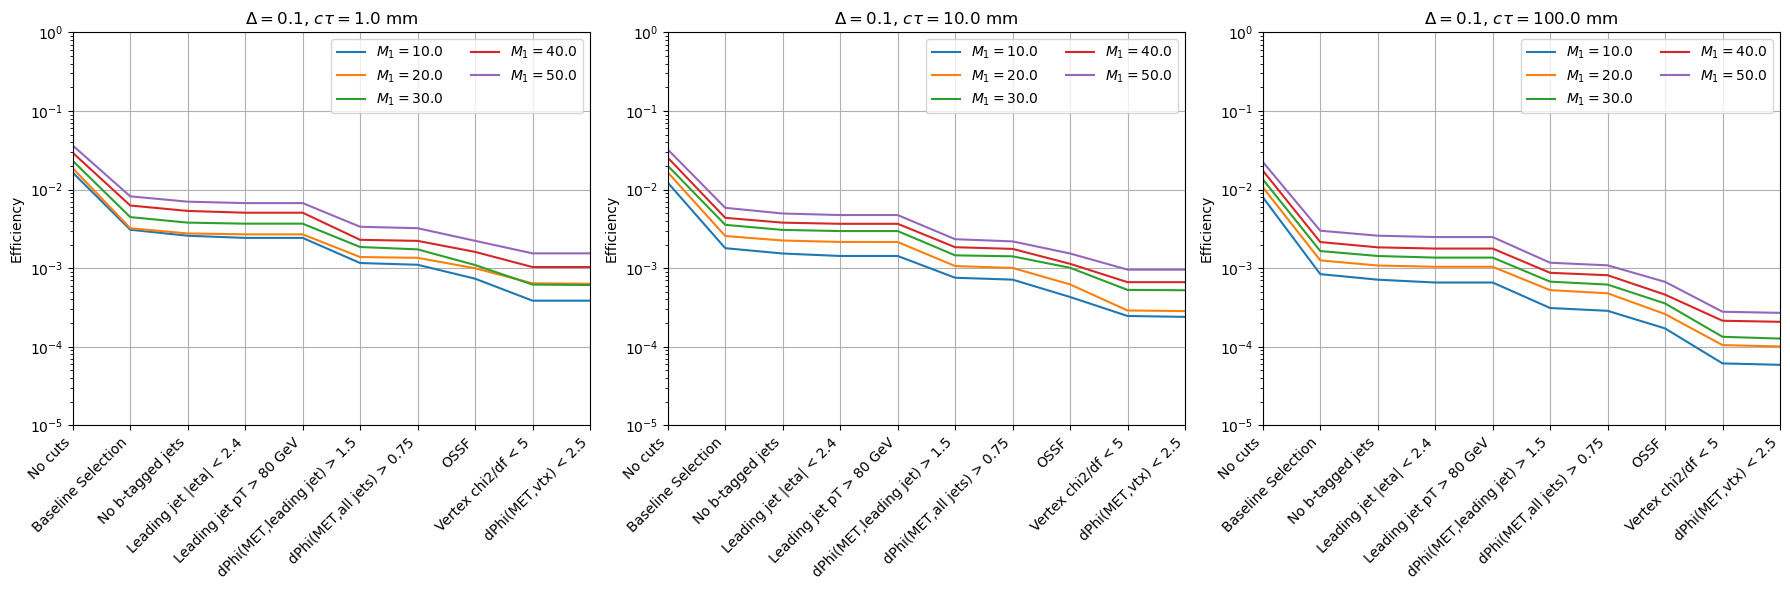

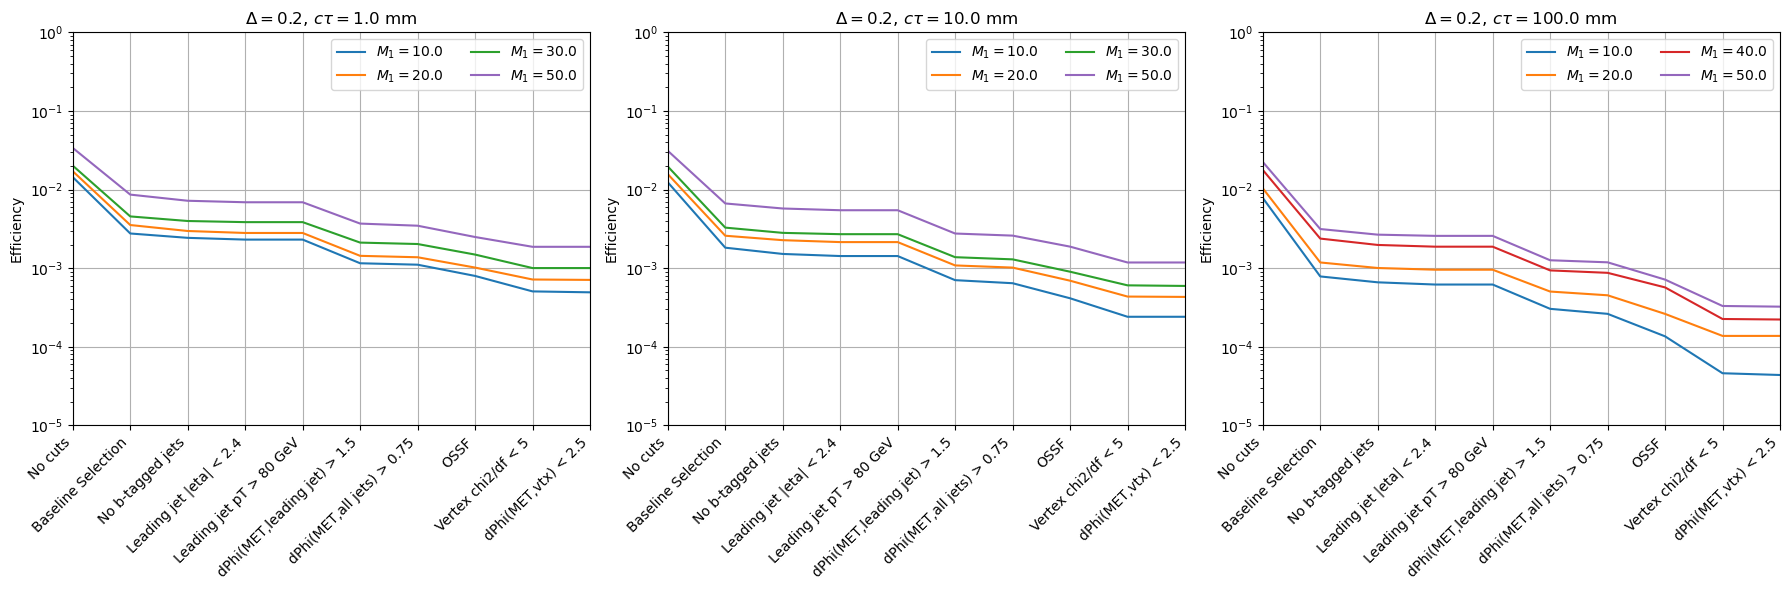

In [6]:
# signal efficiencies by delta/ctau
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    #plt.figure(figsize=(12,12))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [cf_s[pt][cut] for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),color=f"C{all_m1s.index(m1)}")
        plt.legend(loc='upper right',ncol=2)
        plt.ylim([0.00001,1])
        plt.xlim([0,len(cuts)-1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_effs_delta{delta:.1f}.pdf")
    #plt.close()

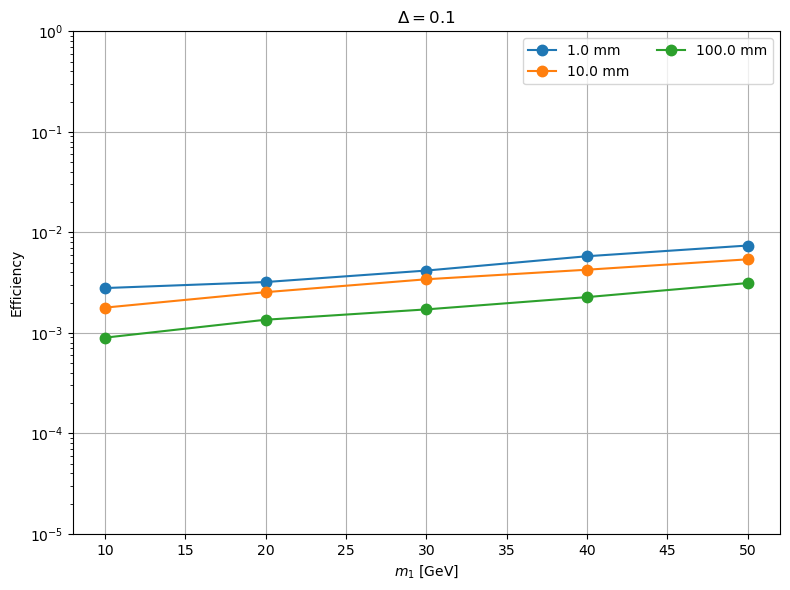

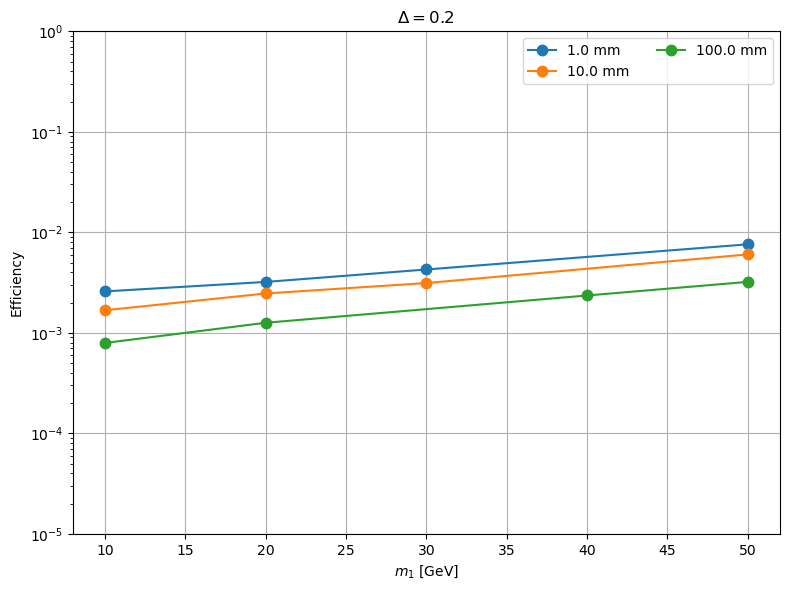

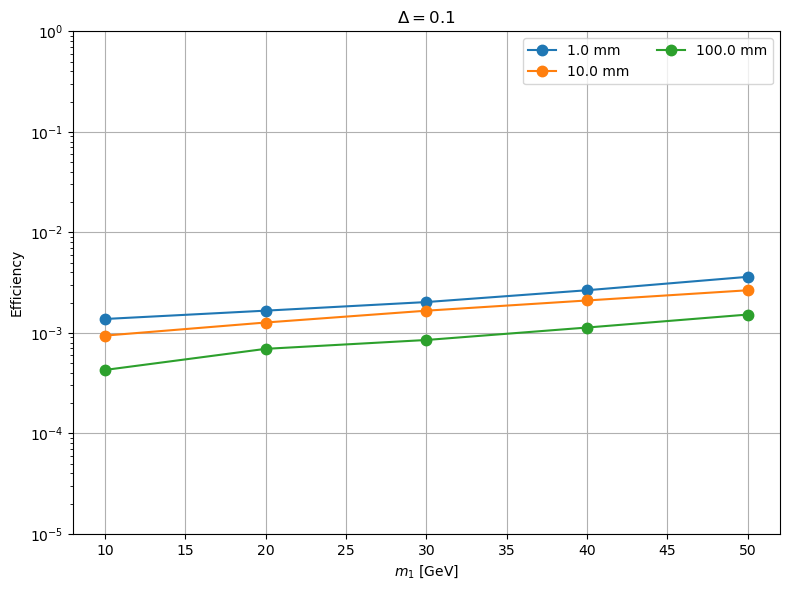

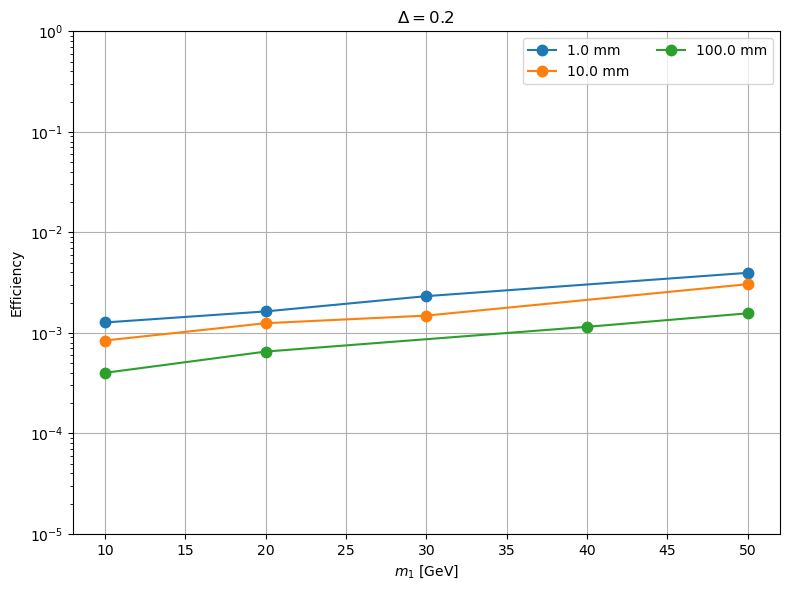

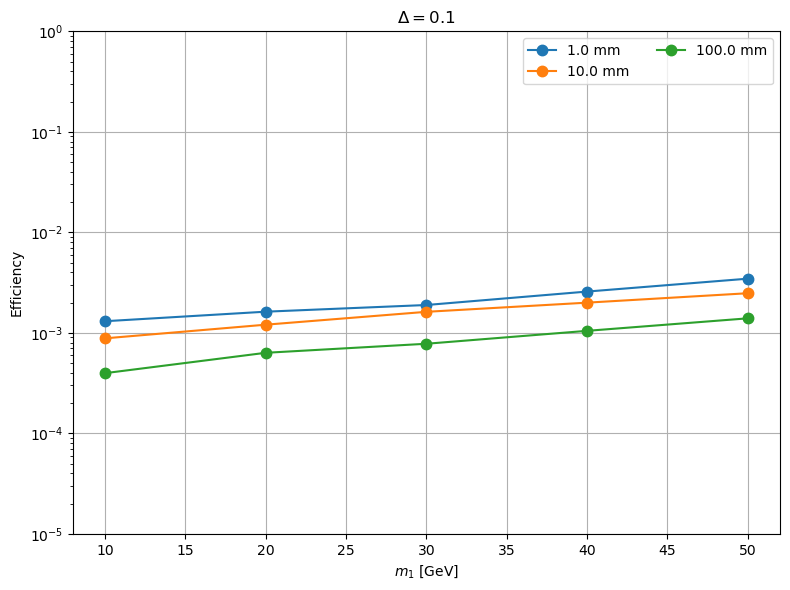

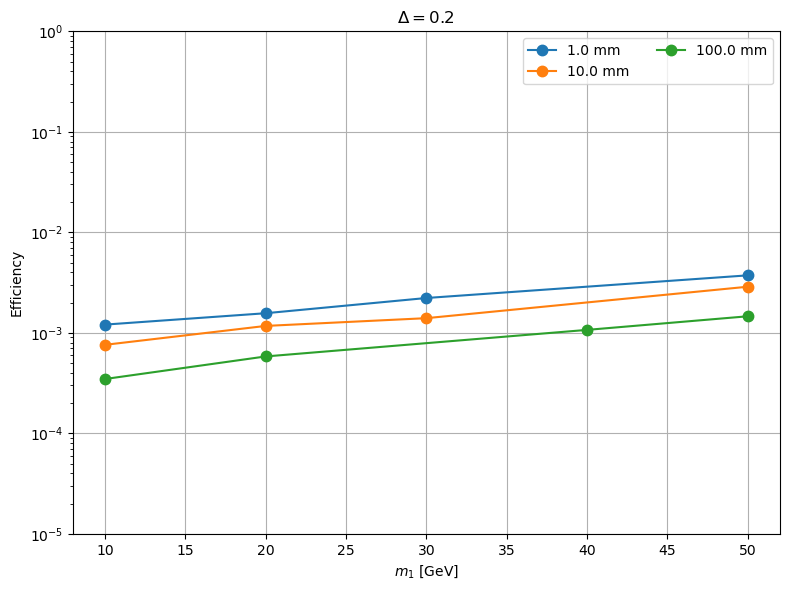

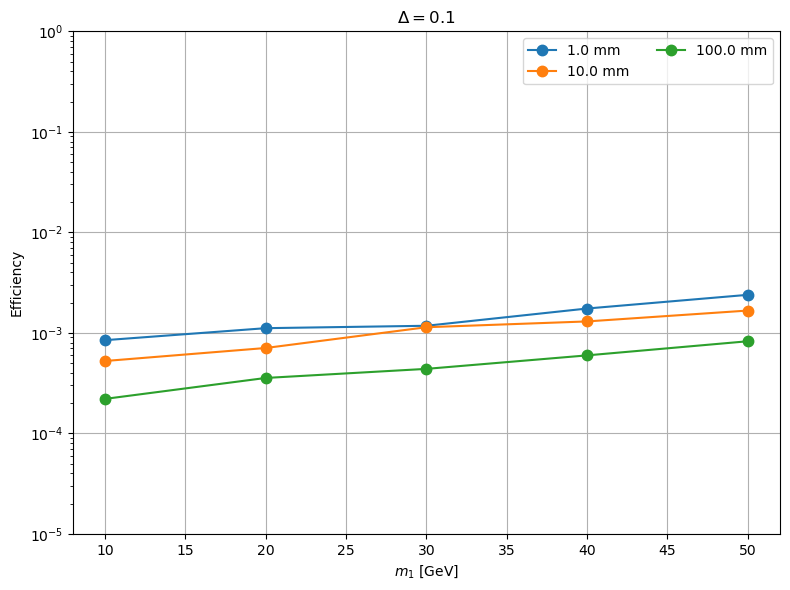

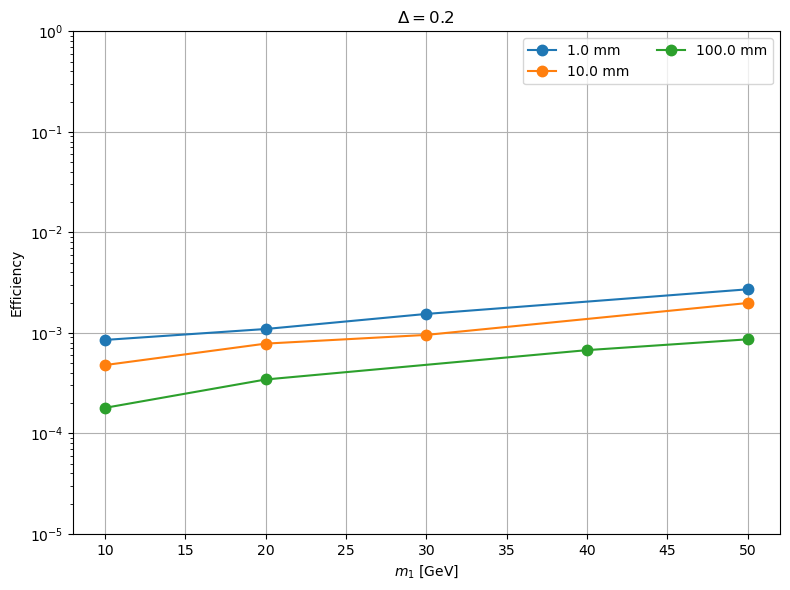

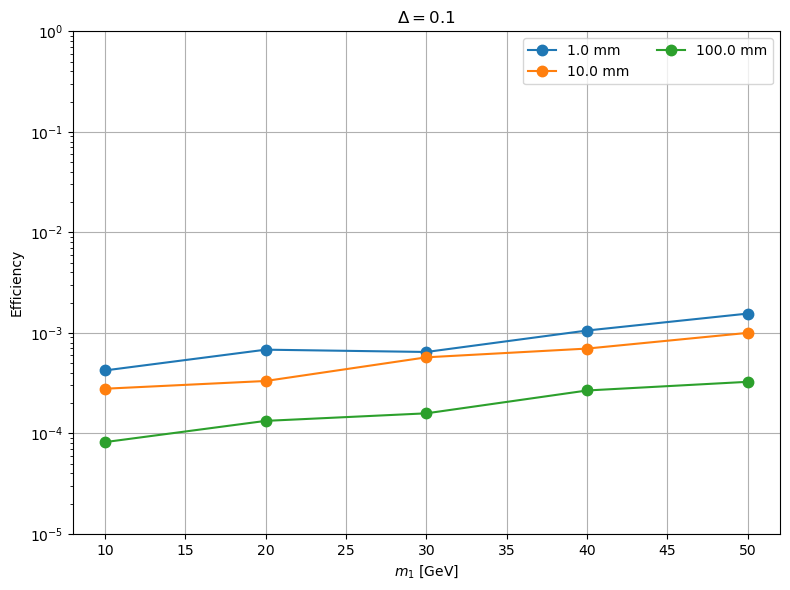

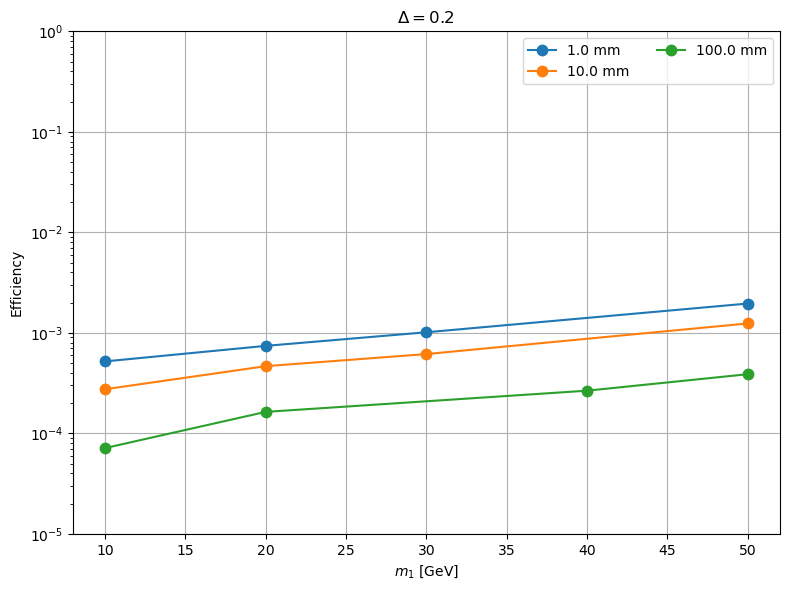

In [7]:
# signal efficiencies by m1 (ctau overlay) on second to last cut
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for cut in ['cut7','cut8','cut9','cut10','cut11']:
    for delta in deltas:
        all_m1s = sorted(list(set(si[si.delta==delta].m1)))
        plt.figure(figsize=(8,6))
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        plt.title(r"$\Delta = {0:.1f}$".format(delta))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(cf_s[pt][cut])
            plt.plot(m1s,effs,label=f"{ct} mm",marker='.',markersize=15)
        plt.legend(loc='upper right',ncol=2)
        plt.ylim([0.00001,1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xlabel("$m_1$ [GeV]")
        plt.grid()
        plt.tight_layout()
        #plt.savefig(f"plots/cutflows/signal_{cut}_effs_delta{delta:.1f}.pdf")
        #plt.close()

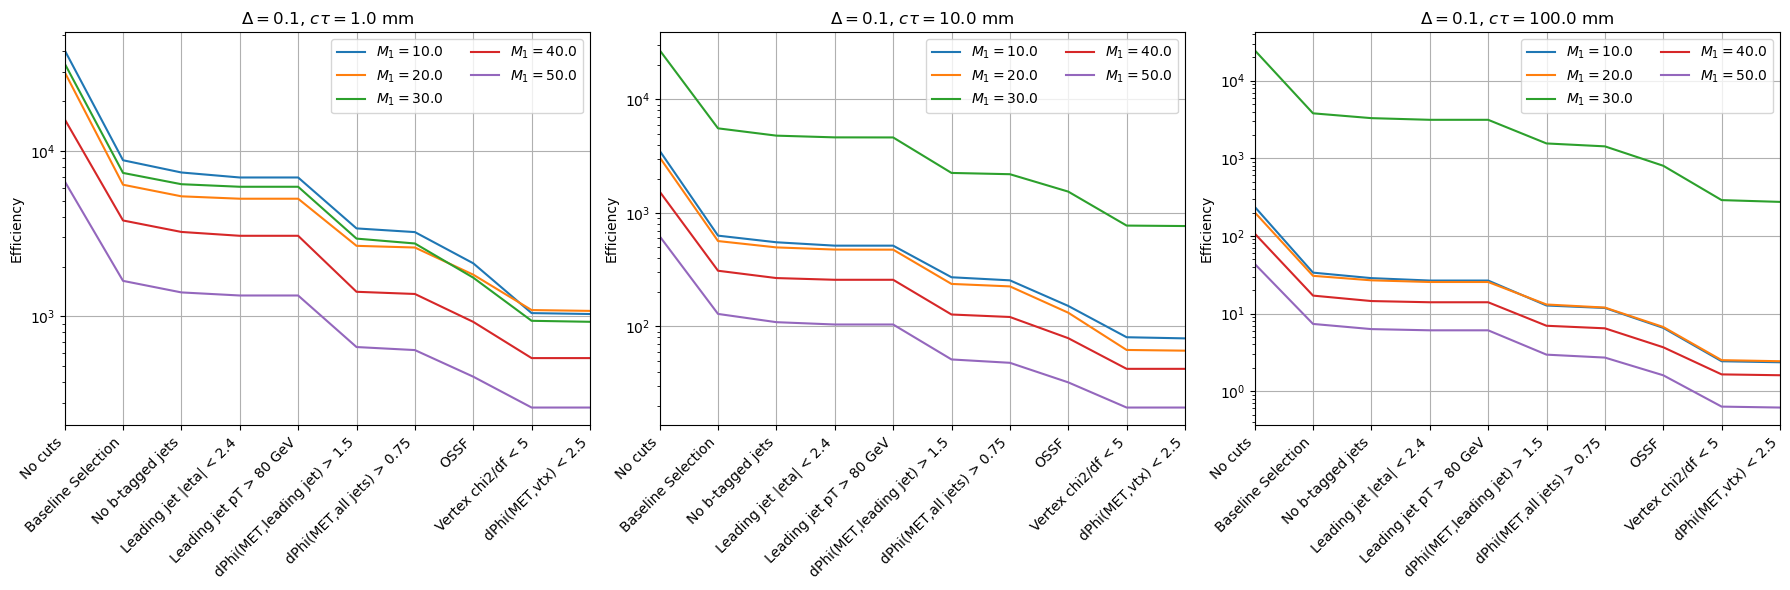

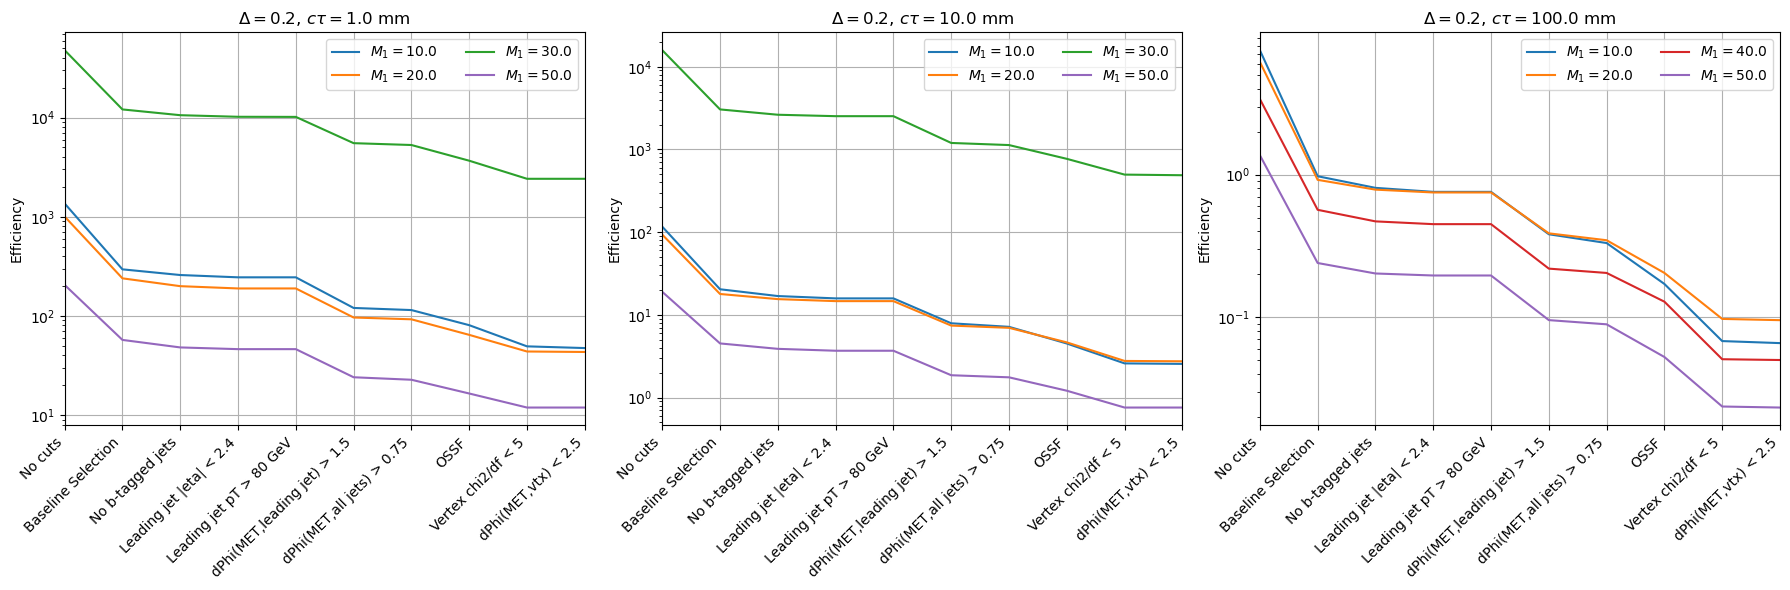

In [8]:
# signal counts by delta/ctau
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    #plt.figure(figsize=(12,12))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [ct_s[pt][cut] for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),color=f"C{all_m1s.index(m1)}")
        plt.legend(loc='upper right',ncol=2)
        #plt.ylim([0.00001,1])
        plt.xlim([0,len(cuts)-1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_counts_delta{delta:.1f}.pdf")
    #plt.close()

/tmp/ipykernel_16638/358614786.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


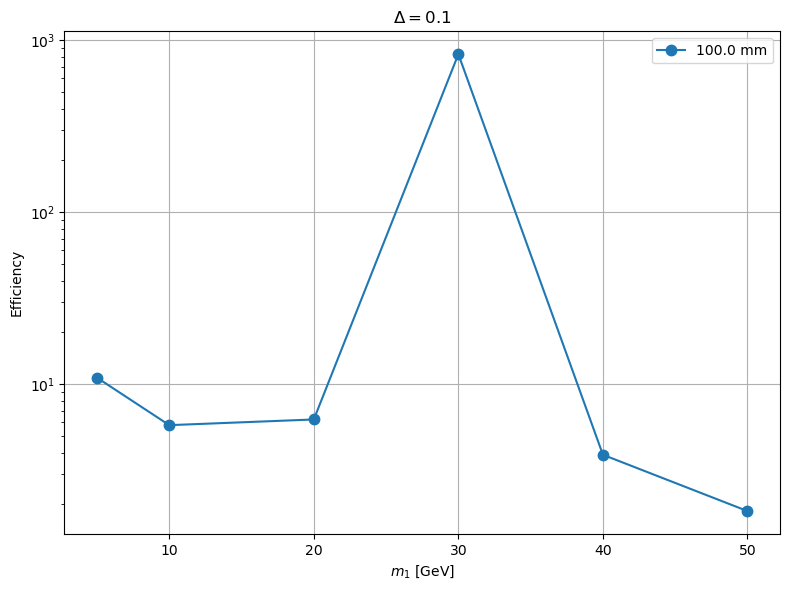

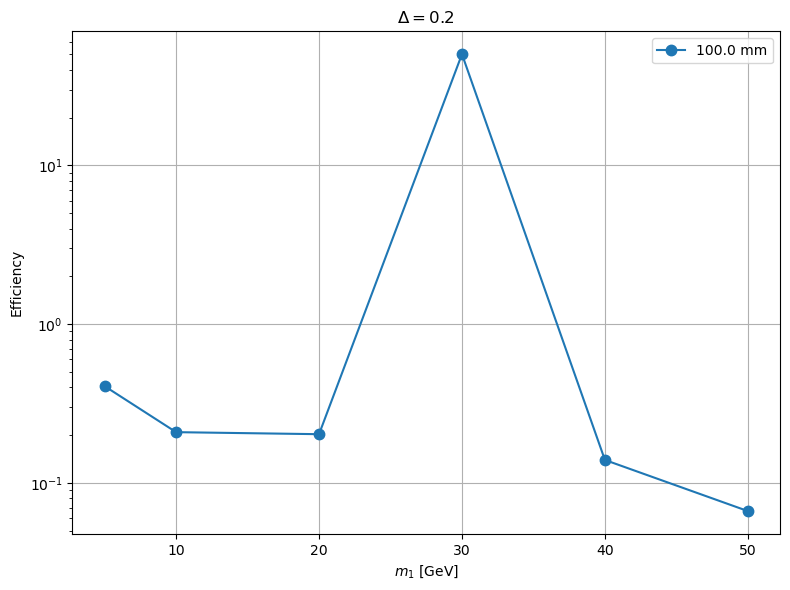

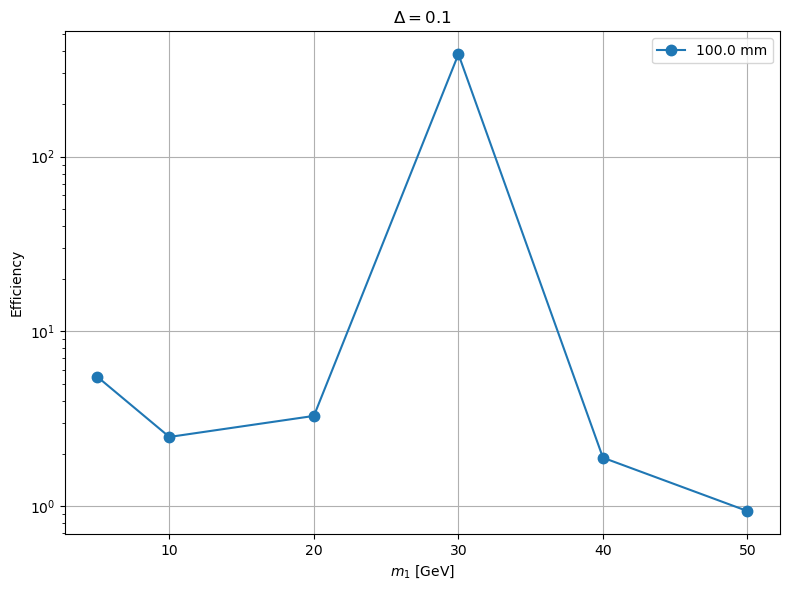

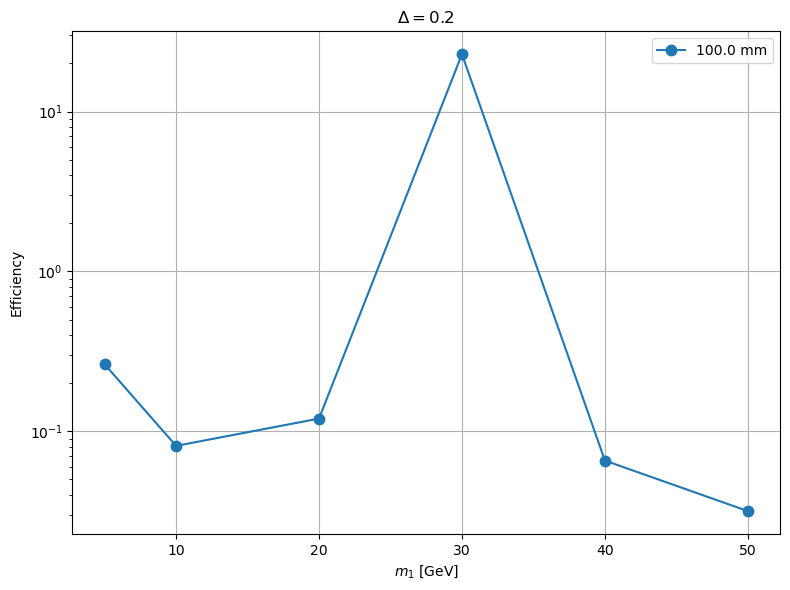

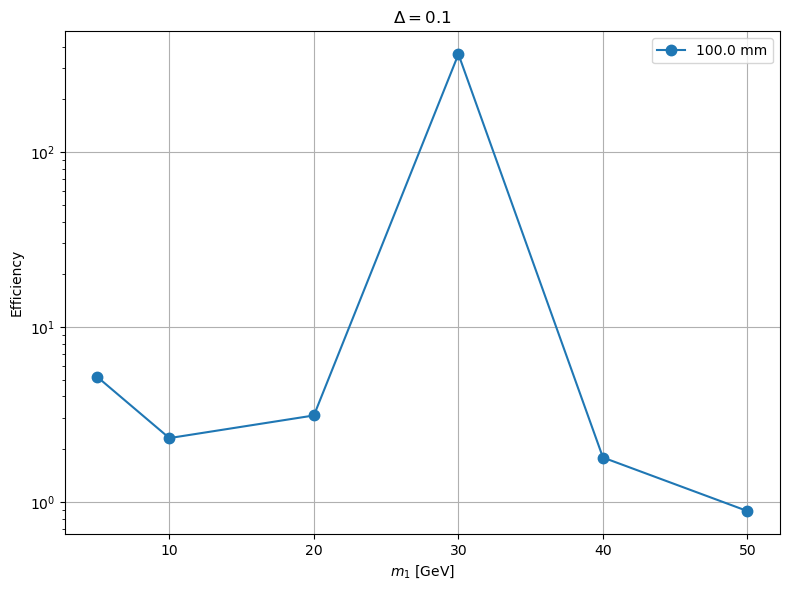

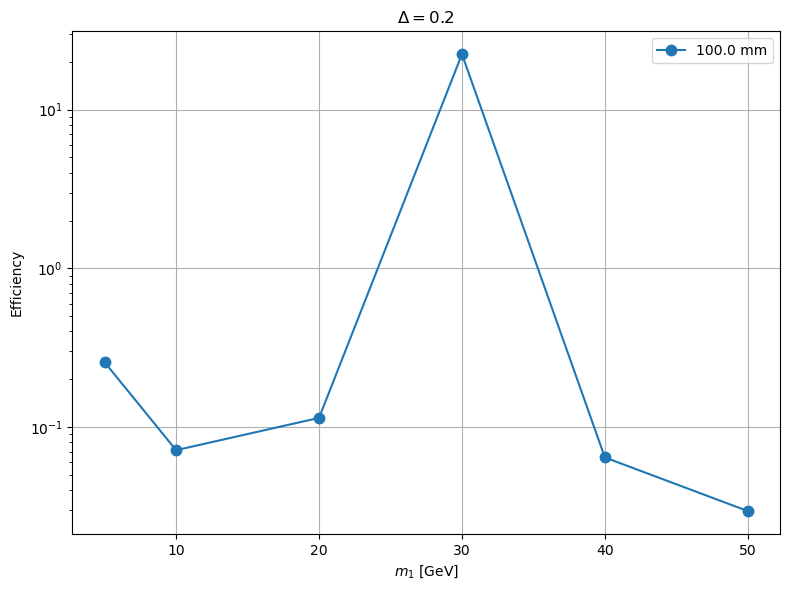

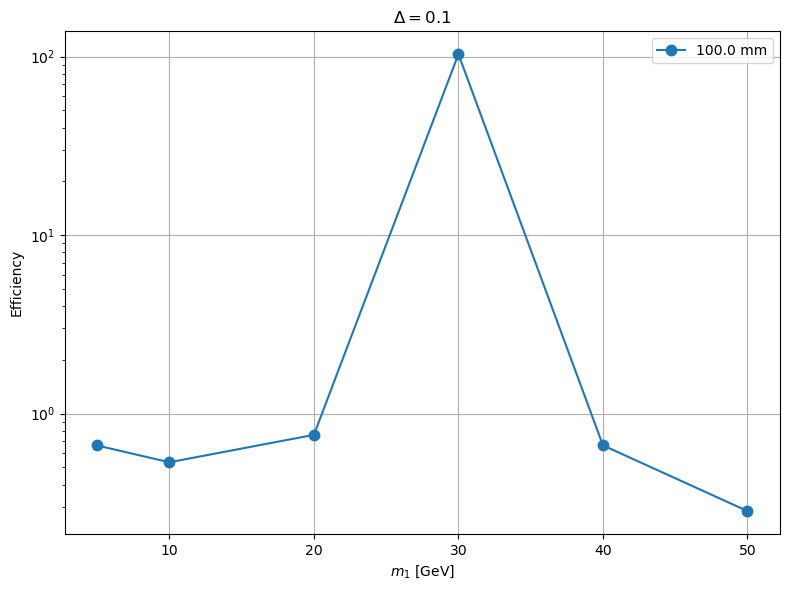

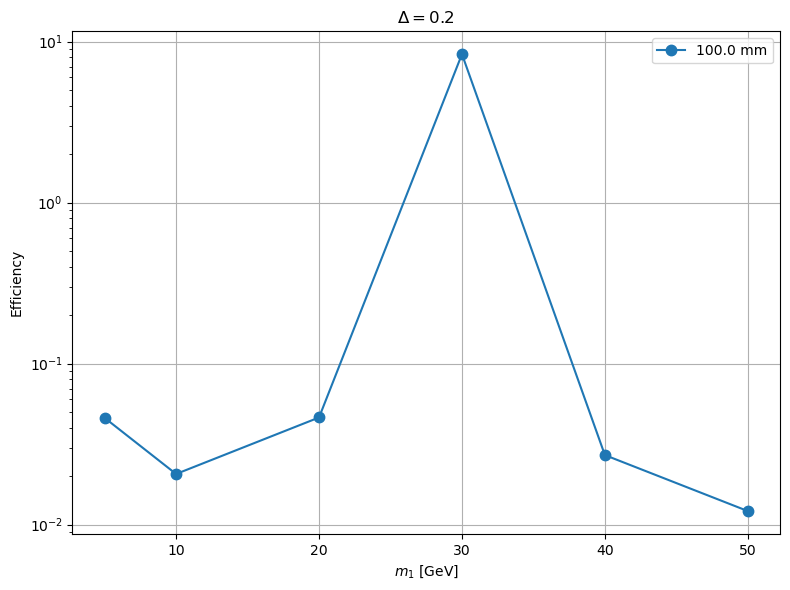

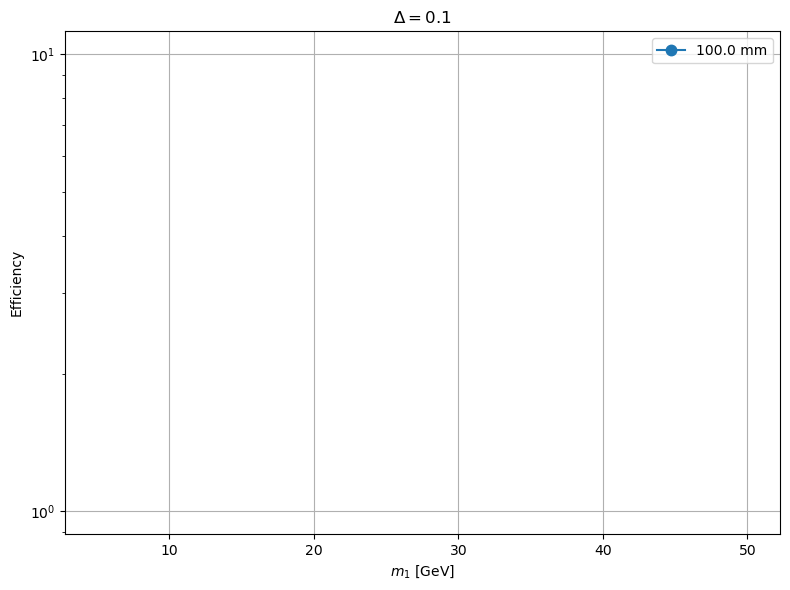

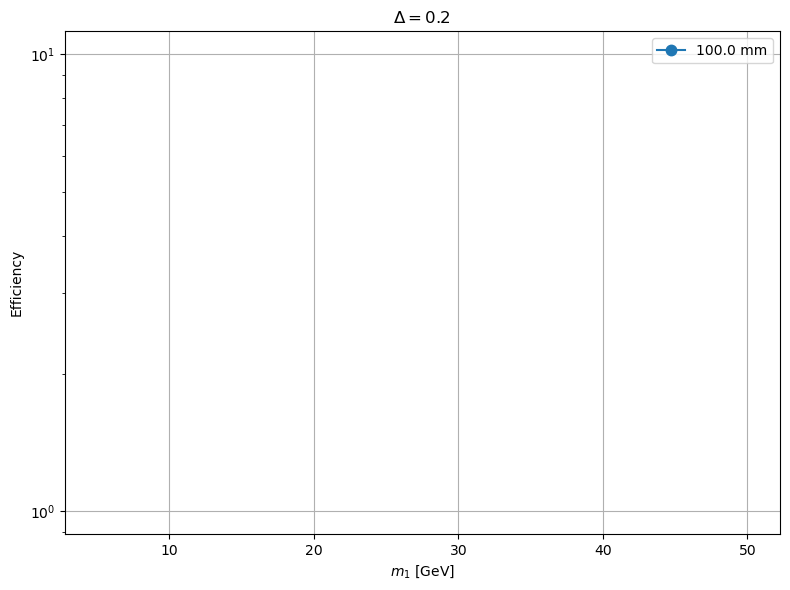

In [26]:
# signal counts by m1 (ctau overlay) on second to last cut
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for cut in ["cut7","cut8","cut9","cut10","cut11"]:
    for delta in deltas:
        all_m1s = sorted(list(set(si[si.delta==delta].m1)))
        plt.figure(figsize=(8,6))
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        plt.title(r"$\Delta = {0:.1f}$".format(delta))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(ct_s[pt][cut])
            plt.plot(m1s,effs,label=f"{ct} mm",marker='.',markersize=15)
        plt.legend(loc='upper right',ncol=2)
        #plt.ylim([0.00001,1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xlabel("$m_1$ [GeV]")
        plt.grid()
        plt.tight_layout()
        #plt.savefig(f"plots/cutflows/signal_{cut}_counts_delta{delta:.1f}.pdf")
        #plt.close()

# Bkg

In [27]:
tot_bkg_cts = {}
tot_bkg_effs = {}
total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
for b in bkg['cutflow_cts'].keys():
    cfd = bkg['cutflow_cts'][b]
    effd = bkg['cutflow'][b]
    cts_dict = {k:0 for k in cuts}
    for k in cfd.keys():
        for c in cuts:
            cts_dict[c] += cfd[k][c]
    tot_bkg_cts[b] = cts_dict
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

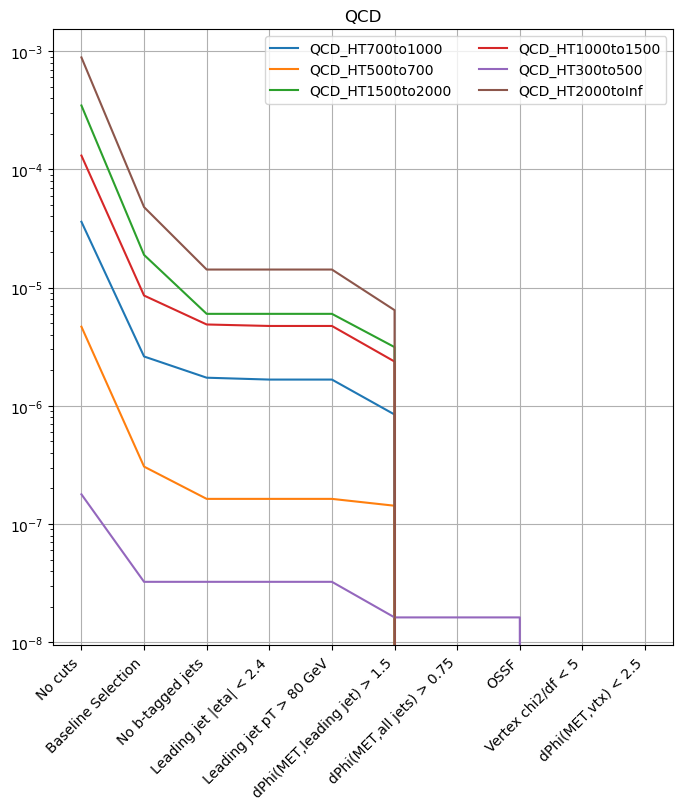

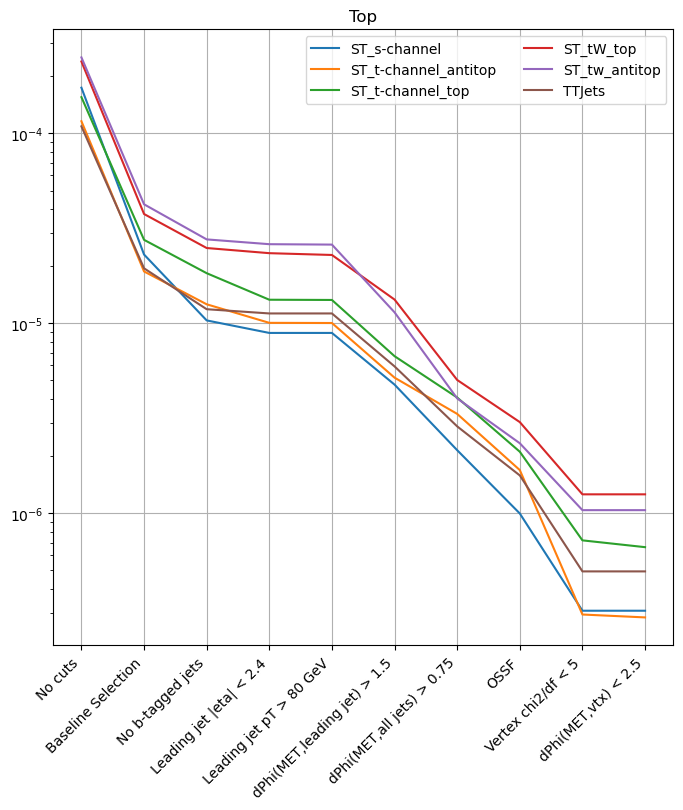

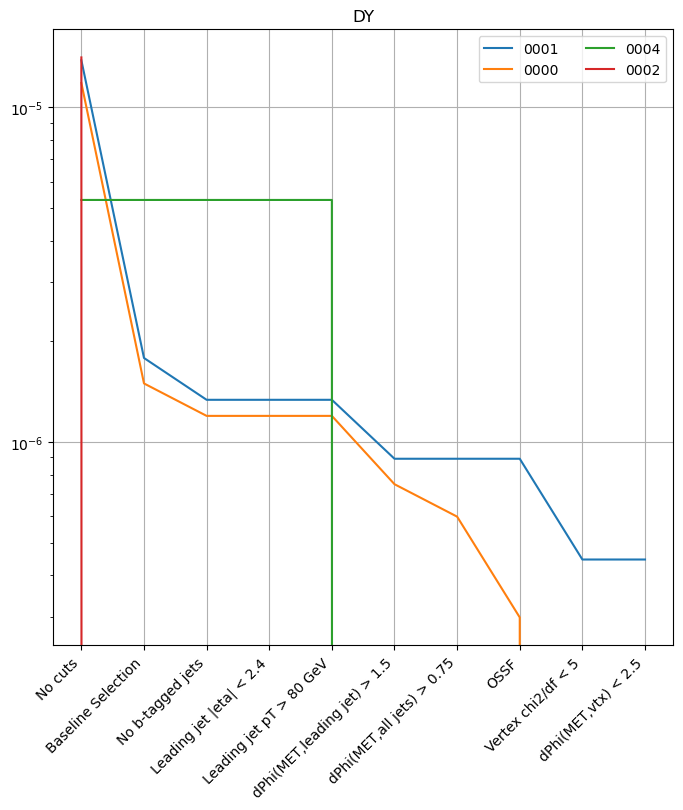

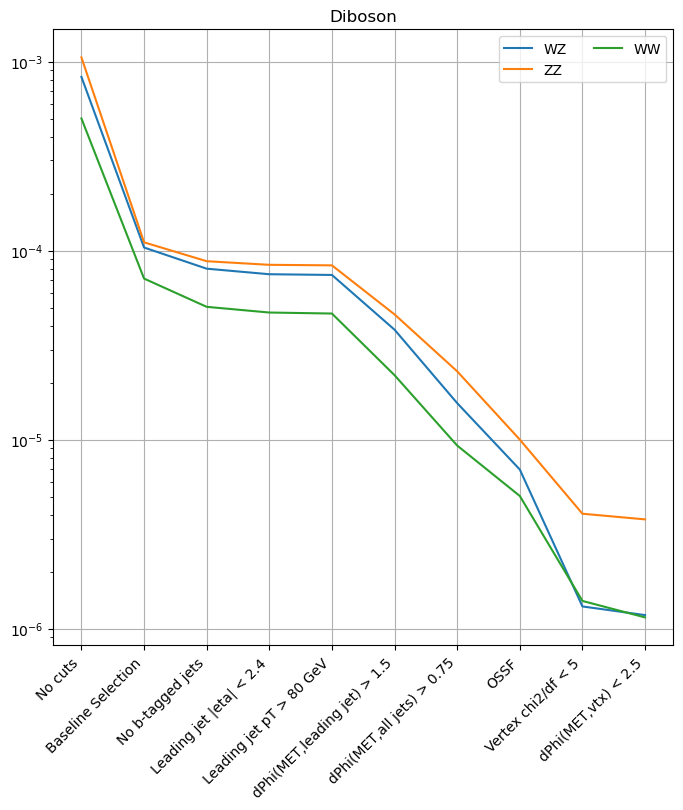

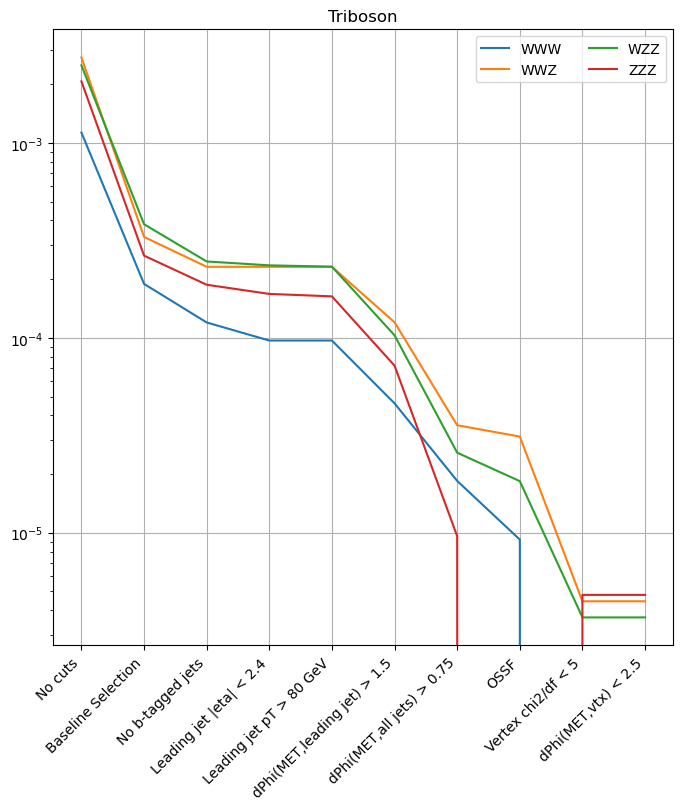

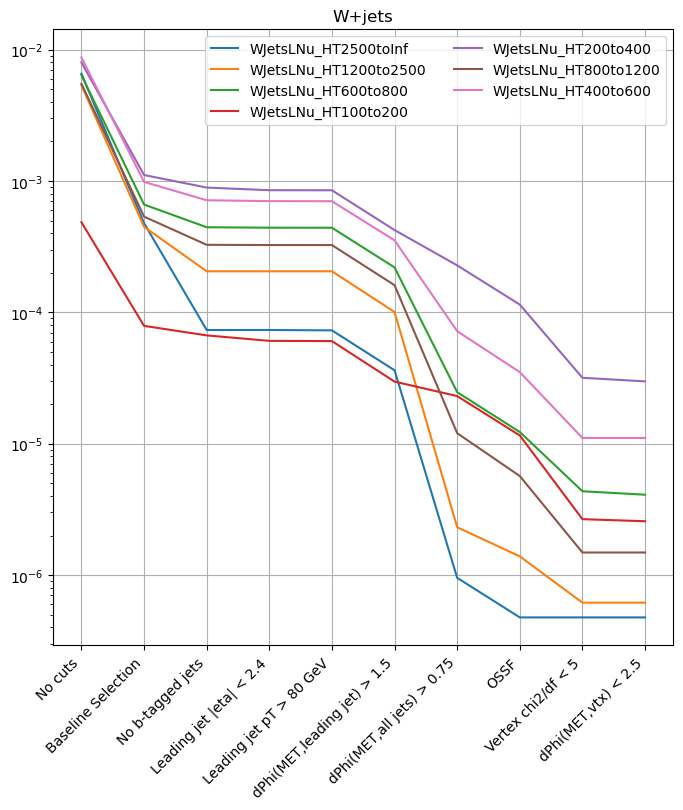

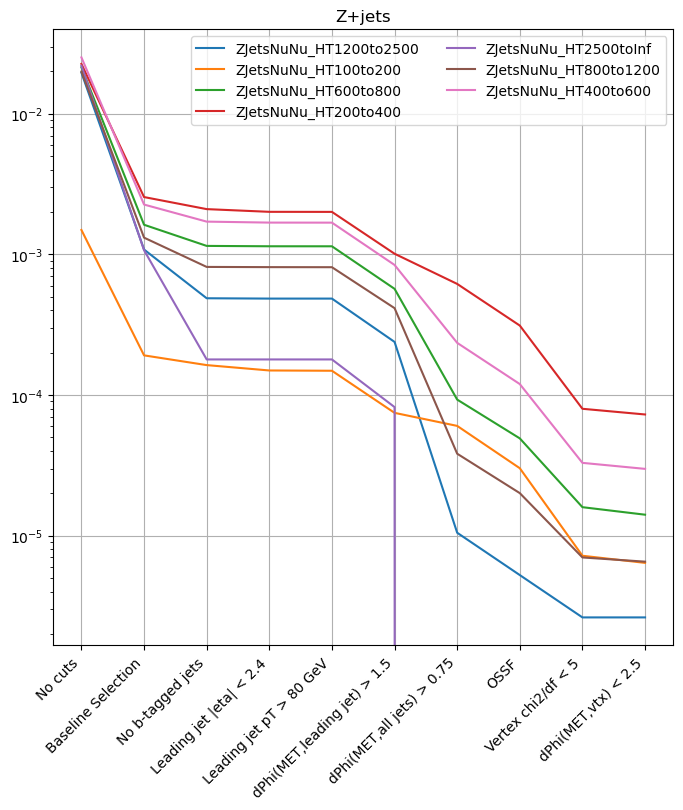

In [10]:
# bkg efficiencies in sub-samples (e.g. HT bins)
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_cutflow.pdf")
    #plt.close()

([<matplotlib.axis.XTick at 0x7f5b3c6bdf40>,
 [Text(0, 0, 'No cuts'),
  Text(1, 0, 'Baseline Selection'),
  Text(2, 0, 'No b-tagged jets'),
  Text(3, 0, 'Leading jet |eta| < 2.4'),
  Text(4, 0, 'Leading jet pT > 80 GeV'),
  Text(5, 0, 'dPhi(MET,leading jet) > 1.5'),
  Text(6, 0, 'dPhi(MET,all jets) > 0.75'),
  Text(7, 0, 'OSSF'),
  Text(8, 0, 'Vertex chi2/df < 5'),
  Text(9, 0, 'dPhi(MET,vtx) < 2.5')])

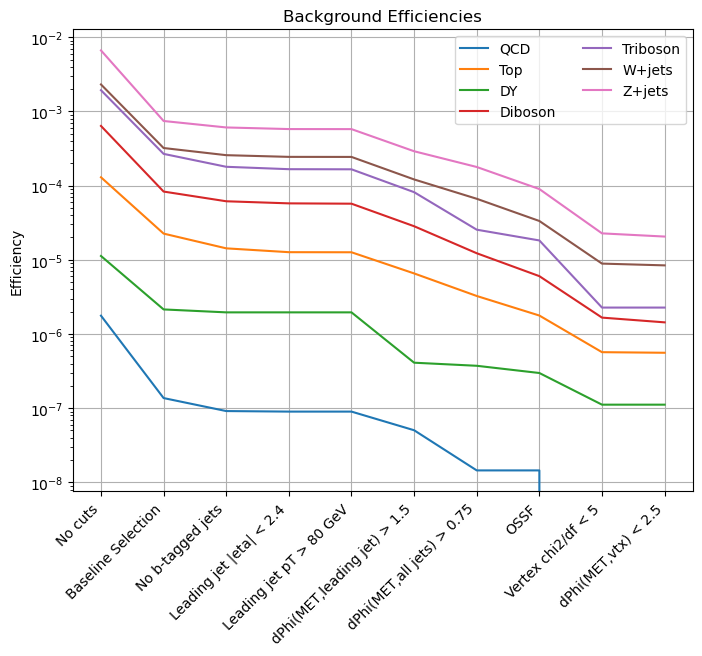

In [11]:
# bkg efficiencies summed over sub-samples
plt.figure(figsize=(8,6))
plt.title("Background Efficiencies")
for b in bkg['cutflow'].keys():
    cfbs = tot_bkg_effs[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])
plt.yscale('log')
plt.ylabel("Efficiency")
plt.legend(loc='upper right',ncol=2)
plt.grid()
plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
#plt.savefig(f"plots/cutflows/bkg_combined_cutflow.pdf")

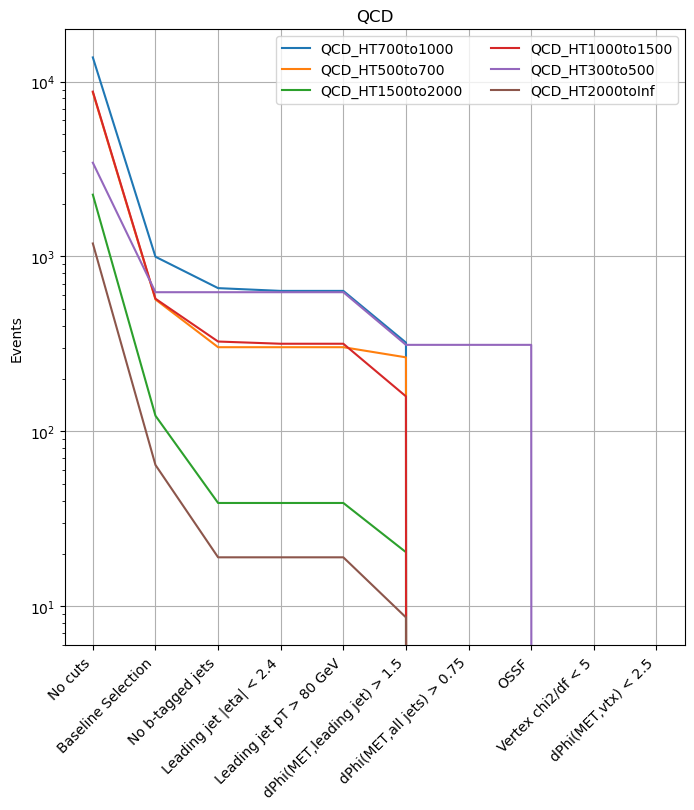

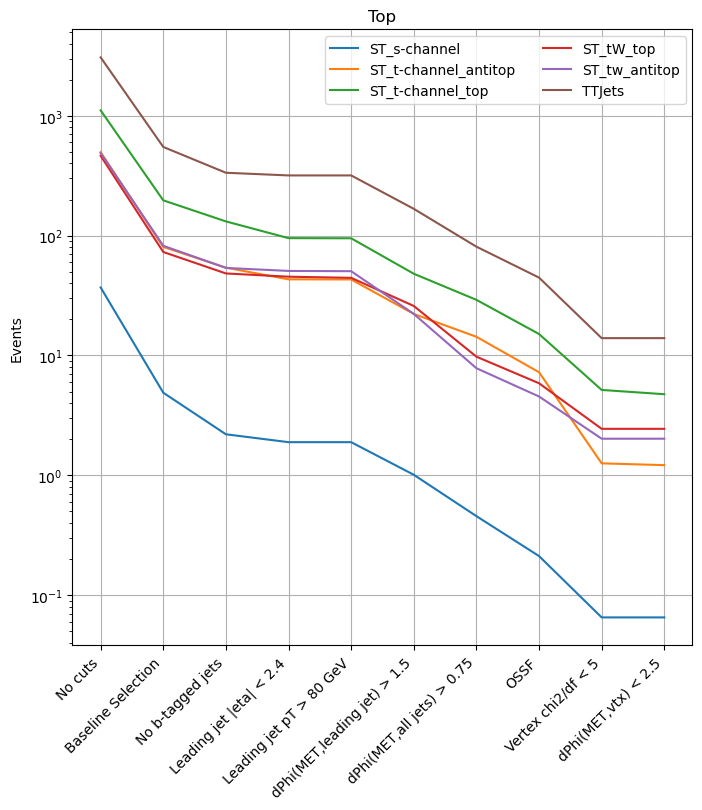

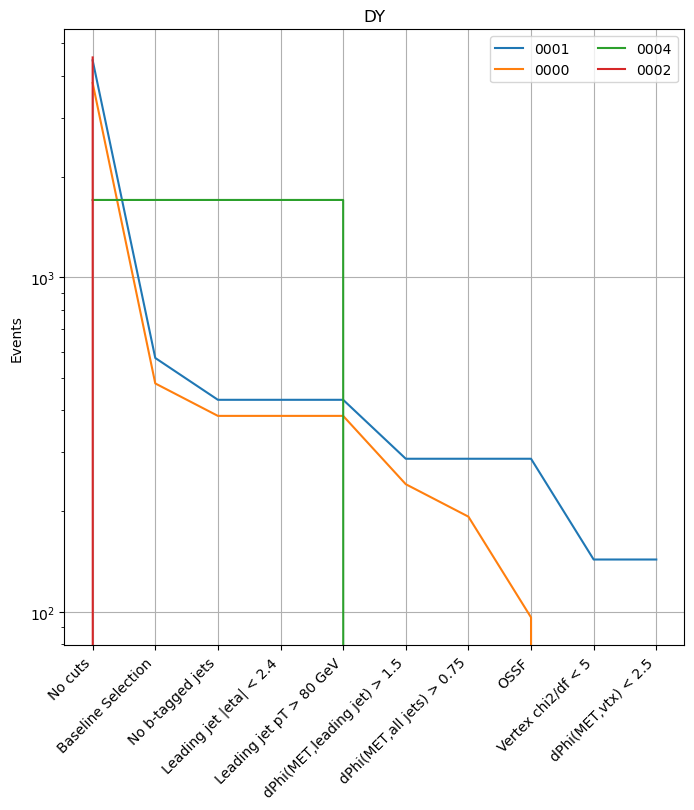

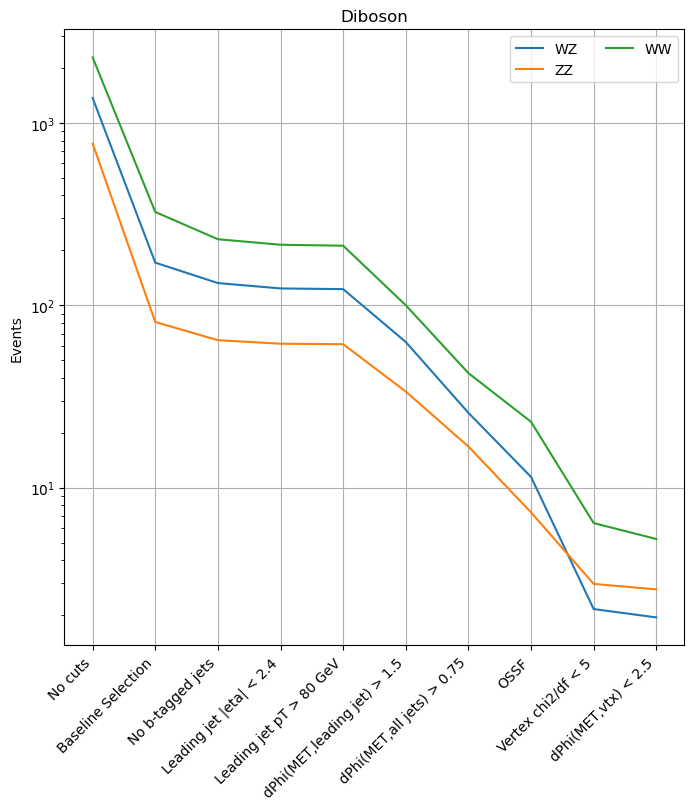

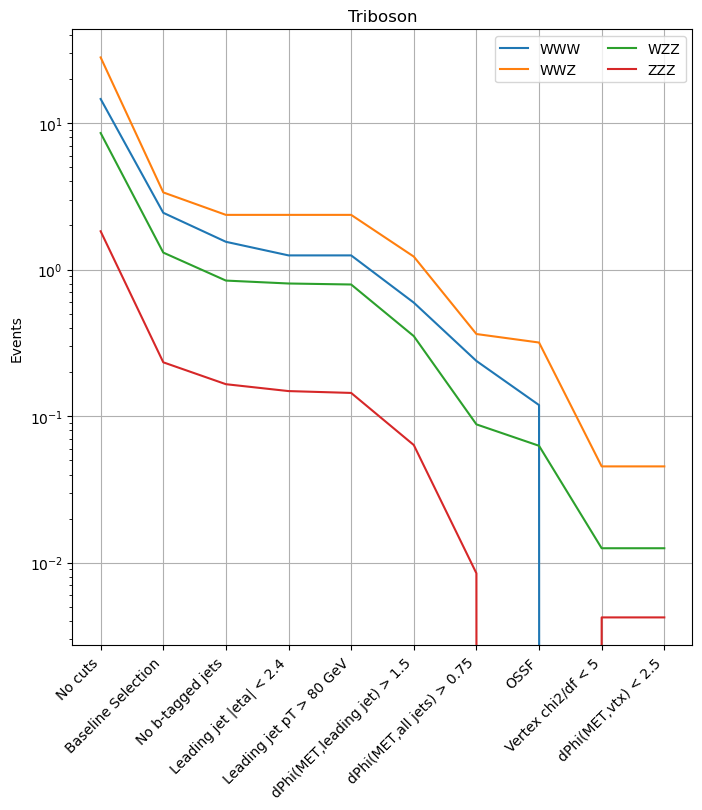

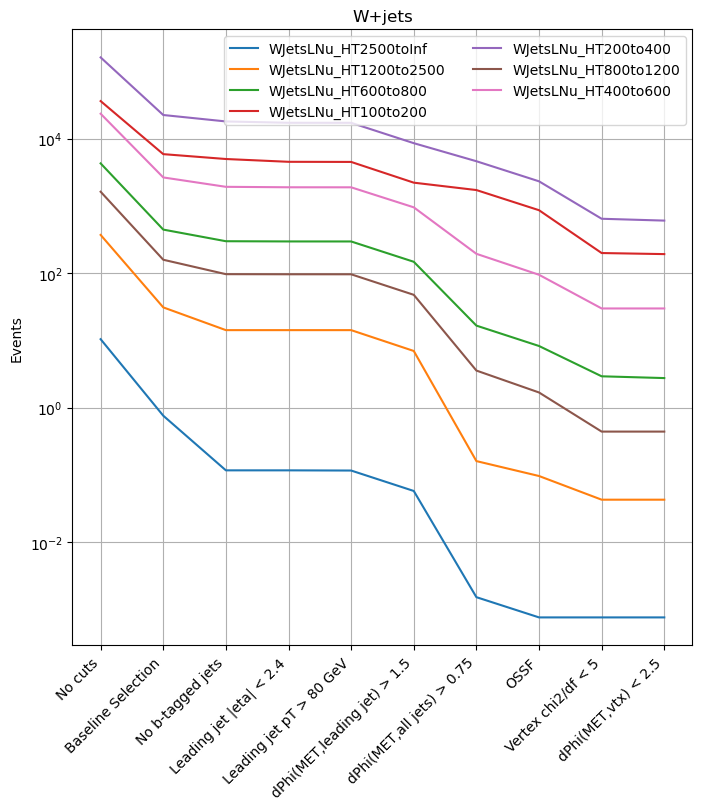

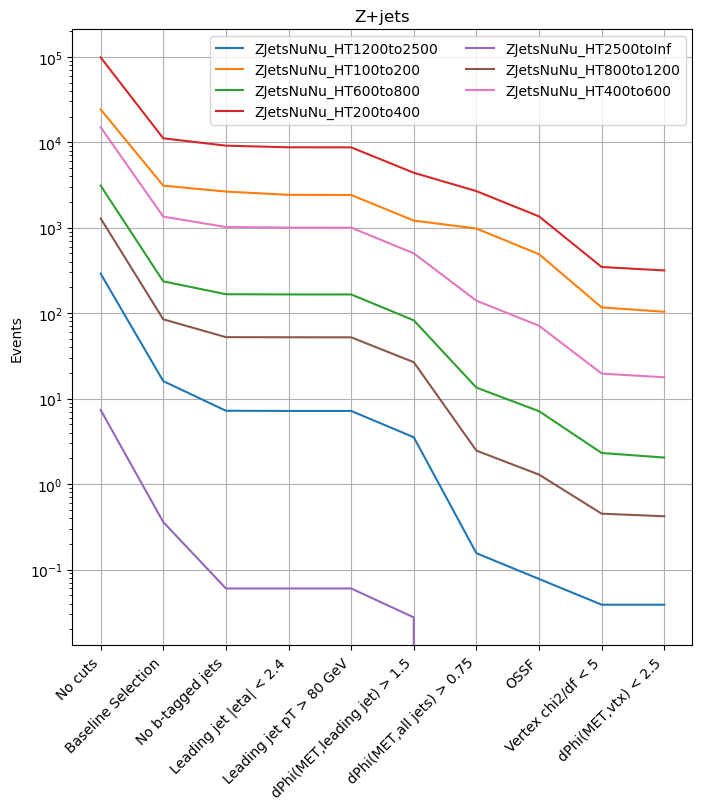

In [12]:
# bkg counts
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow_cts'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.ylabel('Events')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()

([<matplotlib.axis.XTick at 0x7f5b3517c6a0>,
 [Text(0, 0, 'No cuts'),
  Text(1, 0, 'Baseline Selection'),
  Text(2, 0, 'No b-tagged jets'),
  Text(3, 0, 'Leading jet |eta| < 2.4'),
  Text(4, 0, 'Leading jet pT > 80 GeV'),
  Text(5, 0, 'dPhi(MET,leading jet) > 1.5'),
  Text(6, 0, 'dPhi(MET,all jets) > 0.75'),
  Text(7, 0, 'OSSF'),
  Text(8, 0, 'Vertex chi2/df < 5'),
  Text(9, 0, 'dPhi(MET,vtx) < 2.5')])

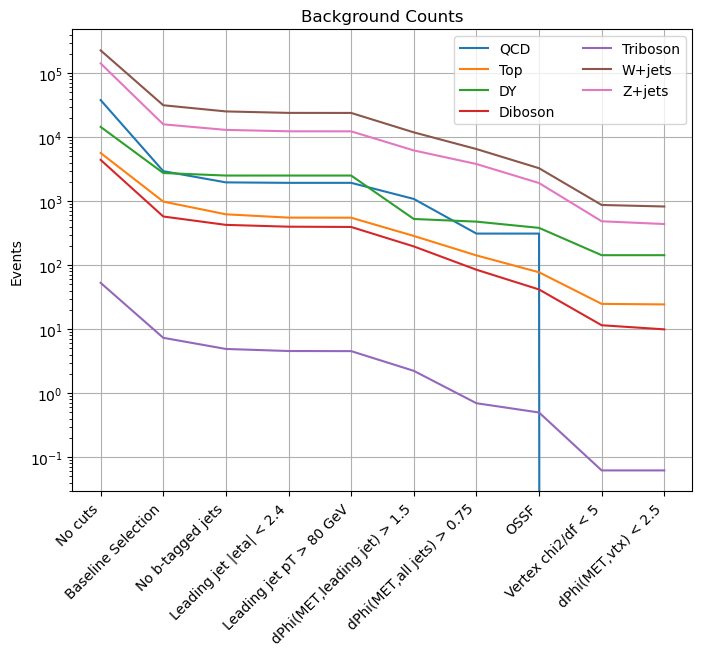

In [13]:
# bkg counts summed over sub-samples
plt.figure(figsize=(8,6))
plt.title("Background Counts")
for b in bkg['cutflow'].keys():
    cfbs = tot_bkg_cts[b]
    cts = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(cts)),cts,label=b)
    #plt.ylim([1e-12,1])
plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc='upper right',ncol=2)
plt.grid()
plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
#plt.savefig(f"plots/cutflows/bkg_combined_counts.pdf")

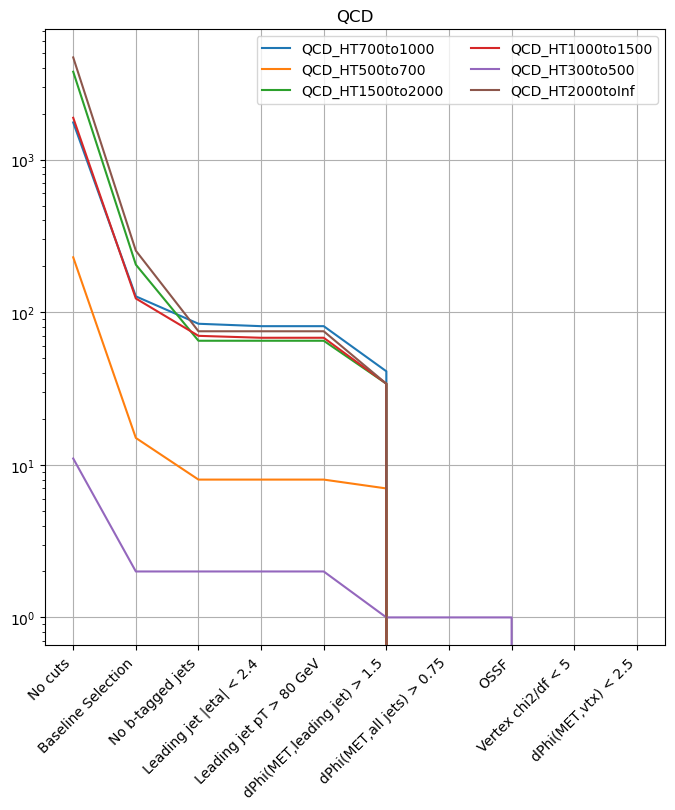

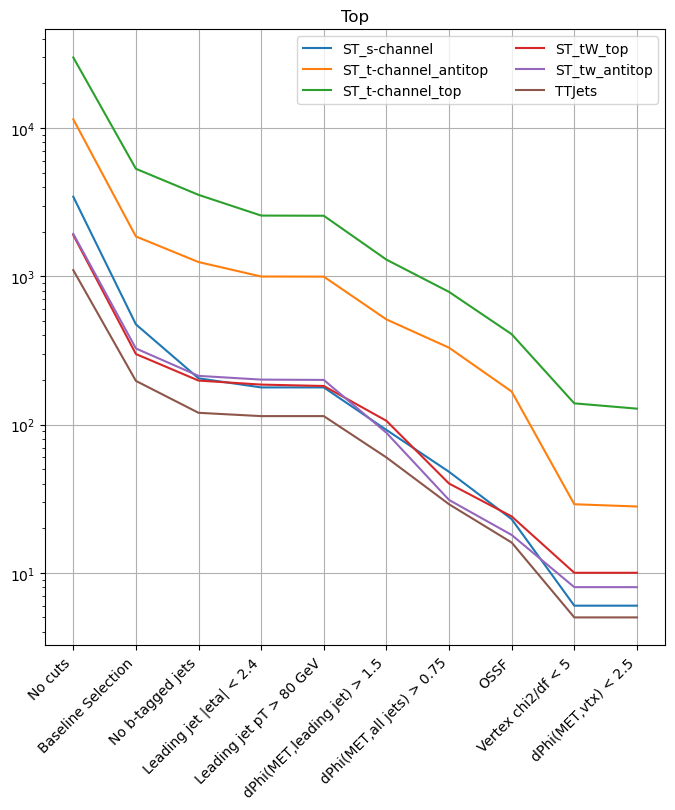

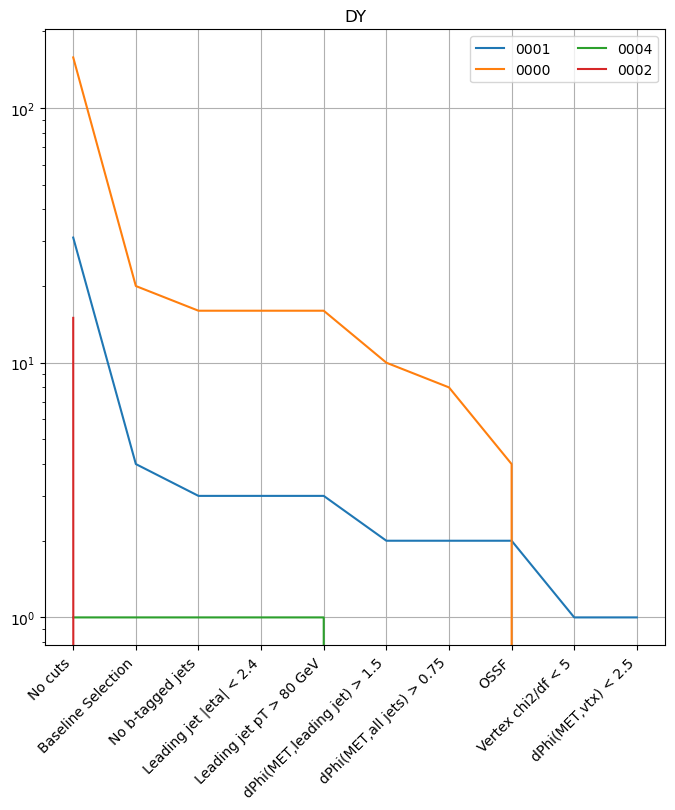

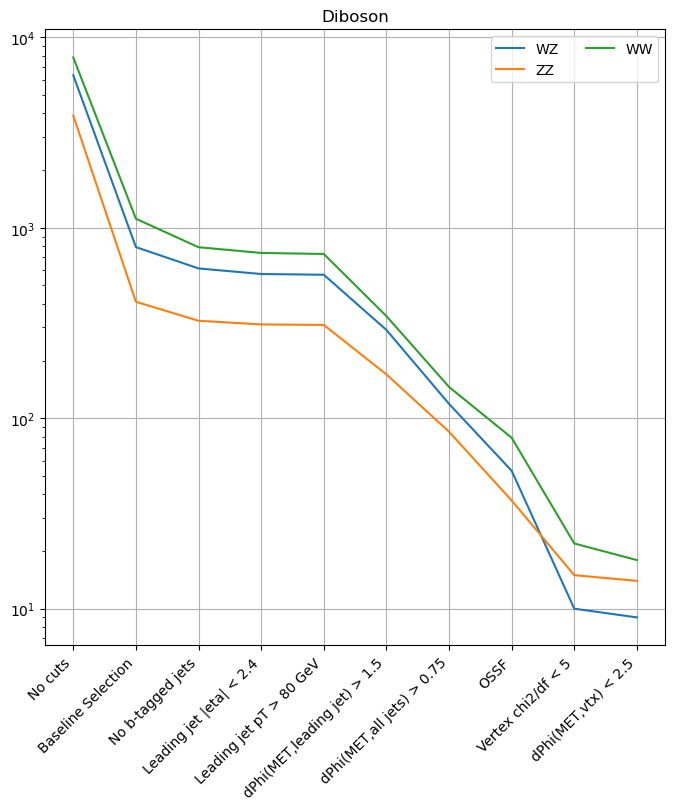

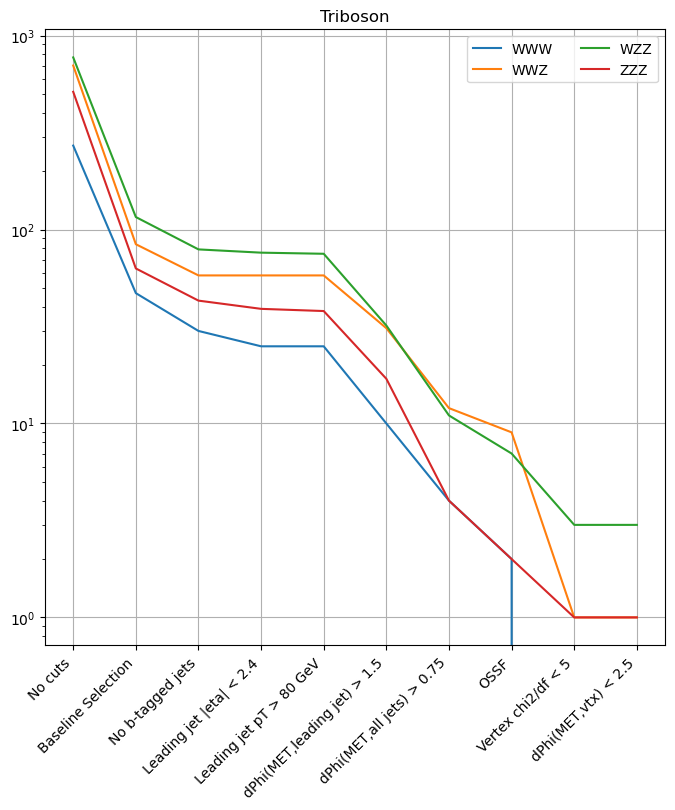

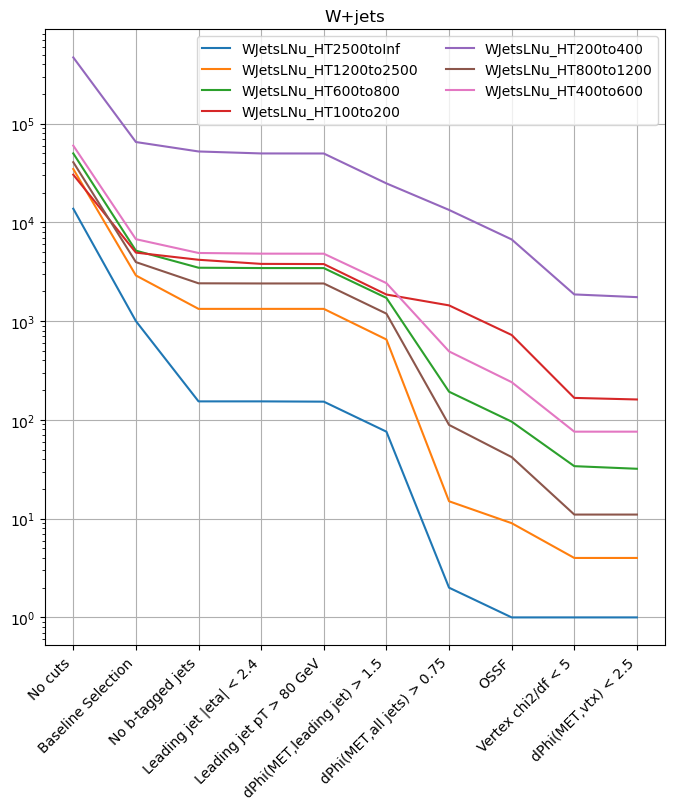

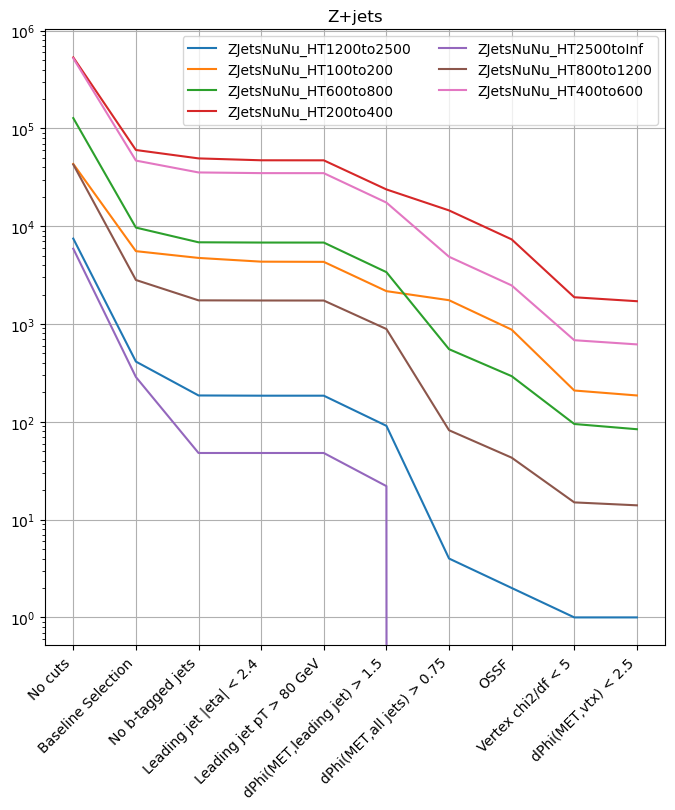

In [15]:
# bkg nevts
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow_nevts'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()

# signal vs bkg

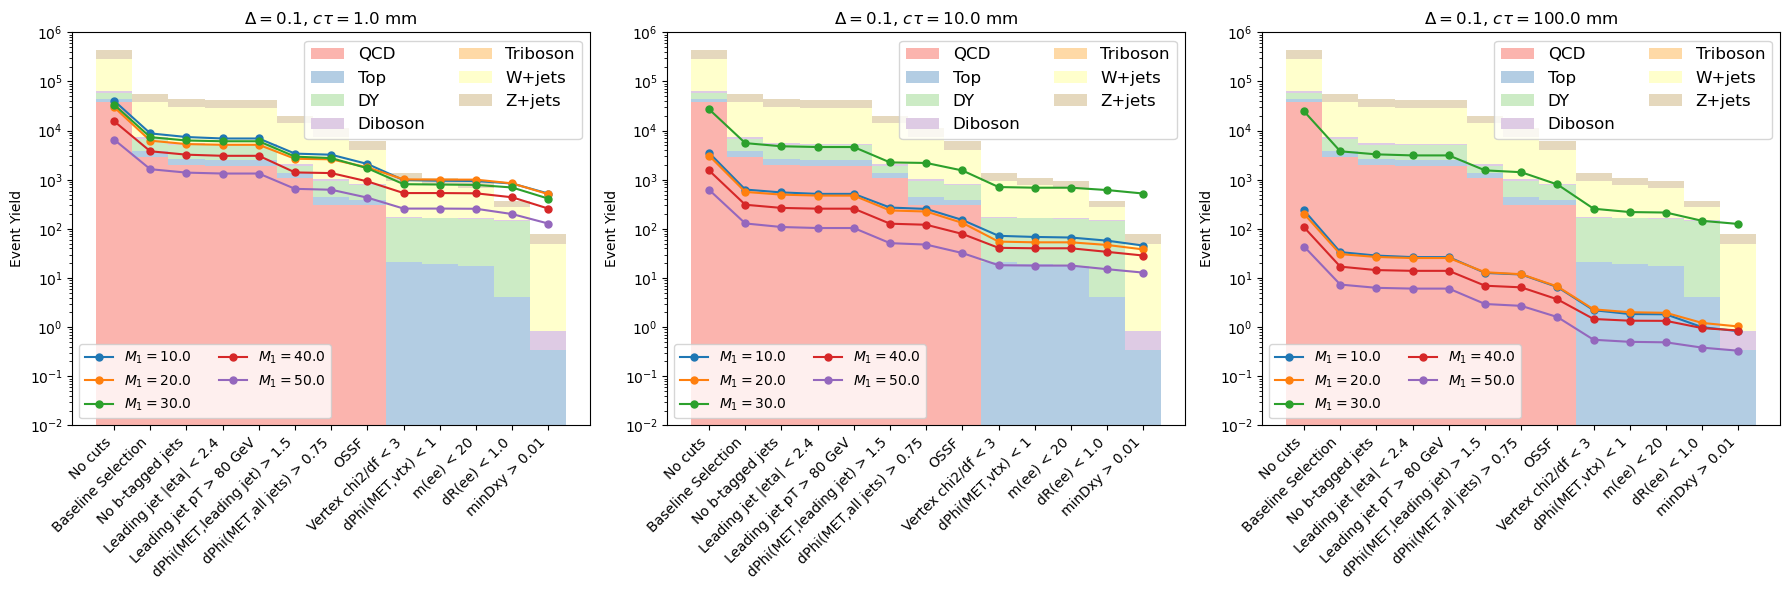

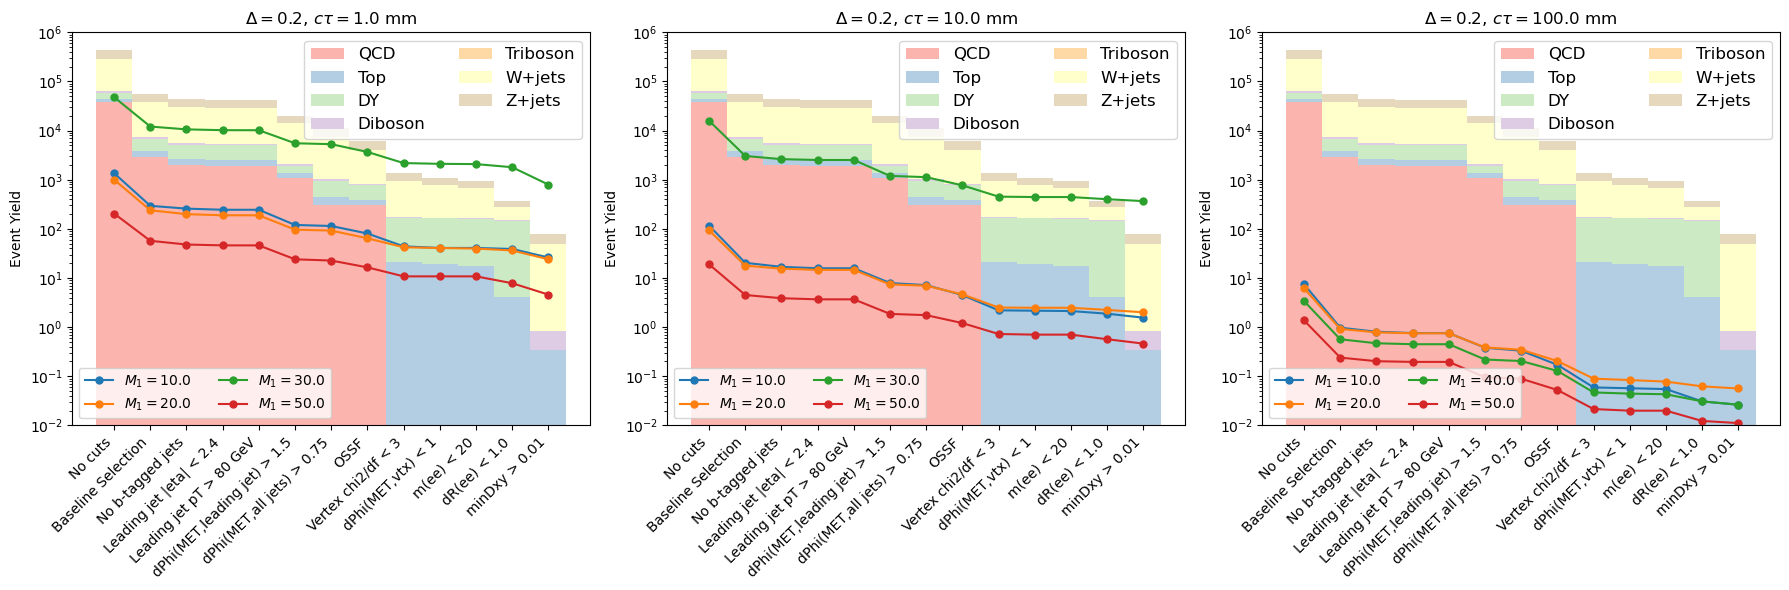

In [28]:
backgrounds = list(tot_bkg_cts.keys())

for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        bkg_labels = []
        bkg_heights = []
        bottoms = np.array([0.0 for c in cuts])
        cmap = plt.get_cmap('Pastel1')
        bars = []
        for j,b in enumerate(backgrounds):
            heights = [tot_bkg_cts[b][c] for c in cuts]
            x = np.arange(len(cuts))
            bars.append(plt.bar(x,heights,width=1,align='center',bottom=bottoms,color=cmap(j)))
            bottoms += np.array(heights)
        leg1 = plt.legend(bars,backgrounds,loc='upper right',fontsize=12,ncol=2)
        ax = plt.gca().add_artist(leg1)
        
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        lines = []
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [sig['cutflow_cts'][pt][cut] for cut in cuts]
            l, = plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),marker='.',markersize=10)
            lines.append(l)
        plt.legend(handles=lines,loc='lower left',ncol=2)
        plt.ylim([1e-2,1e6])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel("Event Yield")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        #plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_vs_itemizedBkg_counts_delta{delta:.1f}.pdf")
    #plt.close()

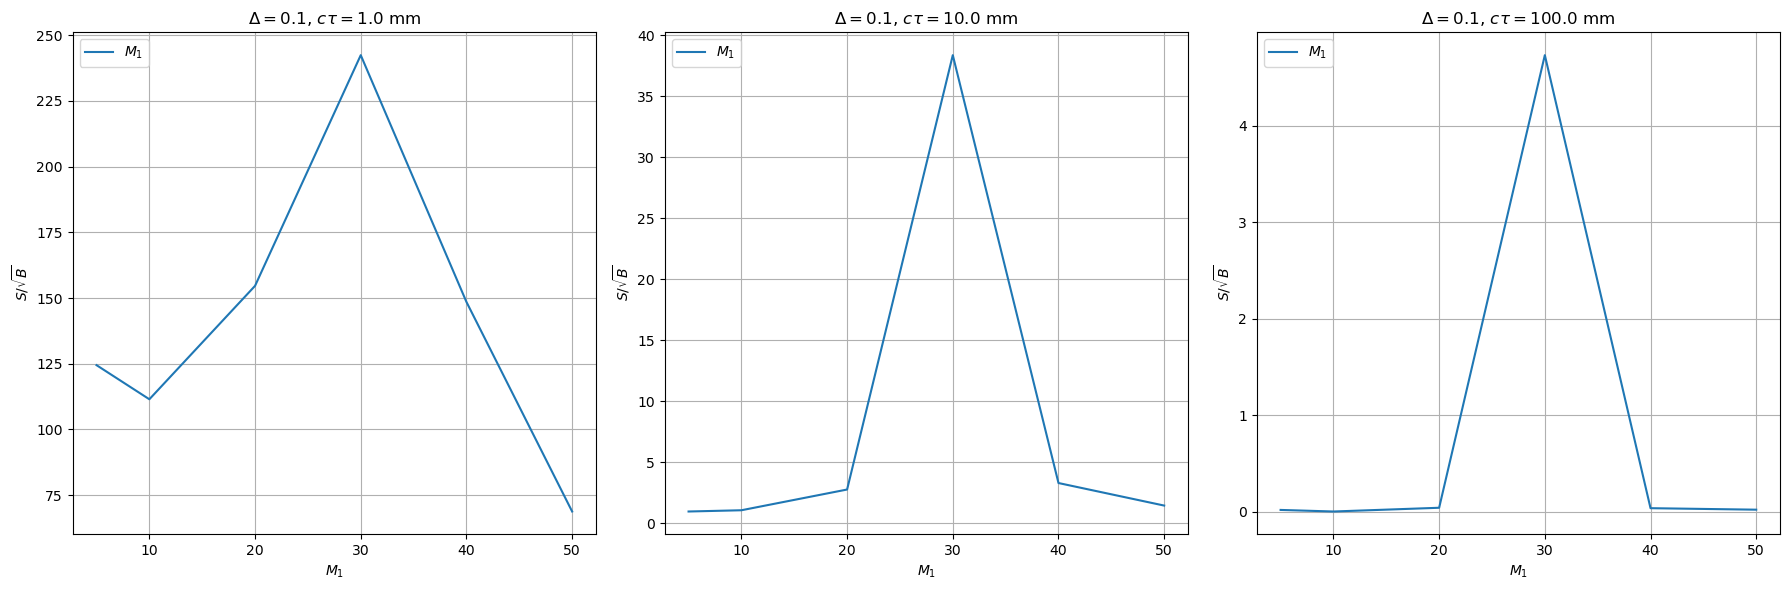

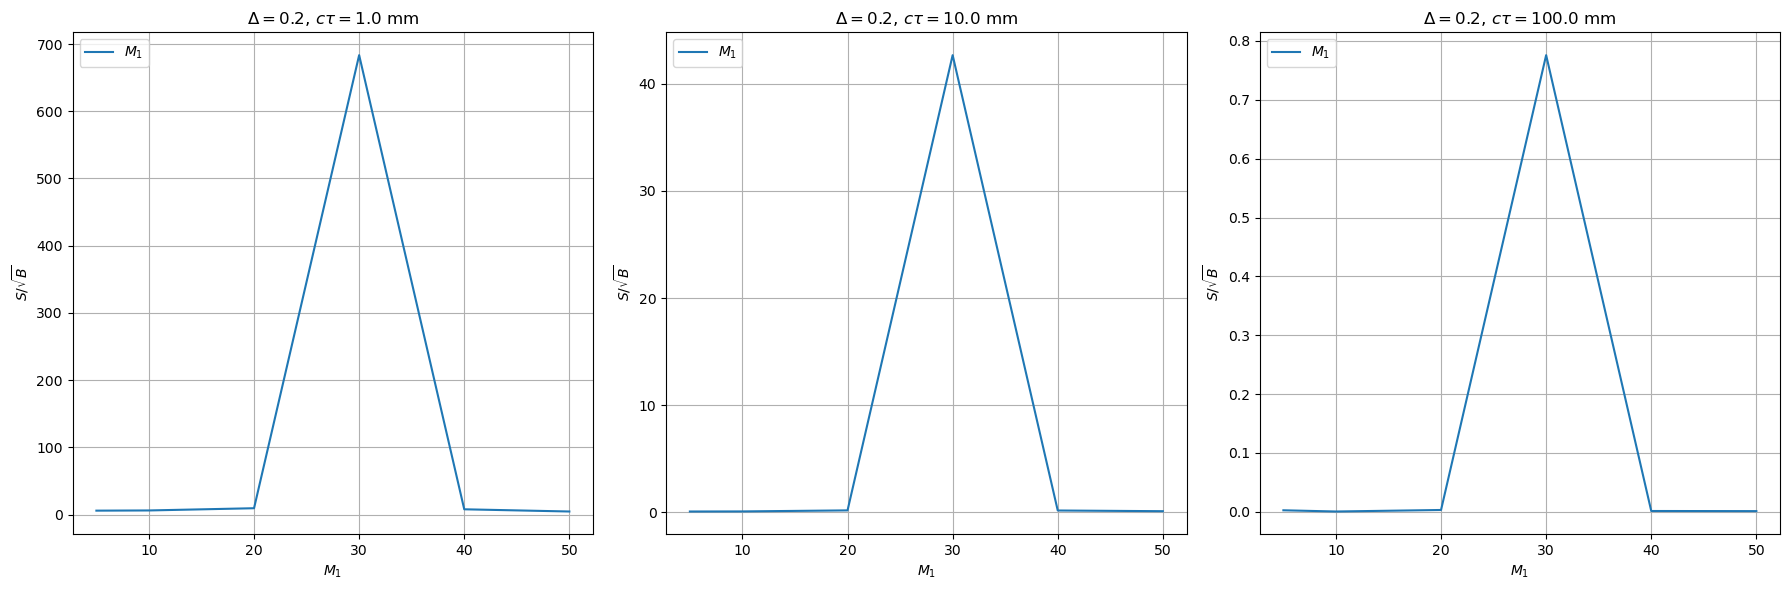

In [8]:
# S/sqrt(B) by mass
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        effs = []
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs.append(ct_s[pt][cuts[-1]]/np.sqrt(bkg_summed_cts[cuts[-1]]))
        plt.plot(m1s,effs,label=r"$M_1$".format(m1))
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_signif_delta{delta:.1f}.pdf")
    #plt.close()

[[[603.1417753567792, 437.2557606091683, 274.6450072096909, 205.6882161540939, 88.10332575551664, 27.11405006917407], [36.72503015626717, 36.816168623645545, 35.53430597862556, 418.5481233483953, 22.75031888766161, 8.596311218664534], [0.6194151807259838, 0.7466247383794686, 0.8022951636695285, 124.0729978359519, 0.7323949170698604, 0.30410662932065774], [31.527289073358386, 17.77297060865755, 8.874074804286547, 322.8576846349978, 2.077795154512042, 0.9170995427236612], [2.016065391999221, 1.3721382133227777, 1.422751919110019, 253.8189087168973, 0.7848322685779661, 0.3481969890812769], [0.036214701408912996, 0.027642153198071496, 0.035963733967757865, 8.675476715042025, 0.025718705400331502, 0.011471305577946449]], [[603.1417753567792, 437.2557606091683, 274.6450072096909, 205.6882161540939, 88.10332575551664, 27.11405006917407], [36.72503015626717, 36.816168623645545, 35.53430597862556, 418.5481233483953, 22.75031888766161, 8.596311218664534], [0.6194151807259838, 0.7466247383794686,

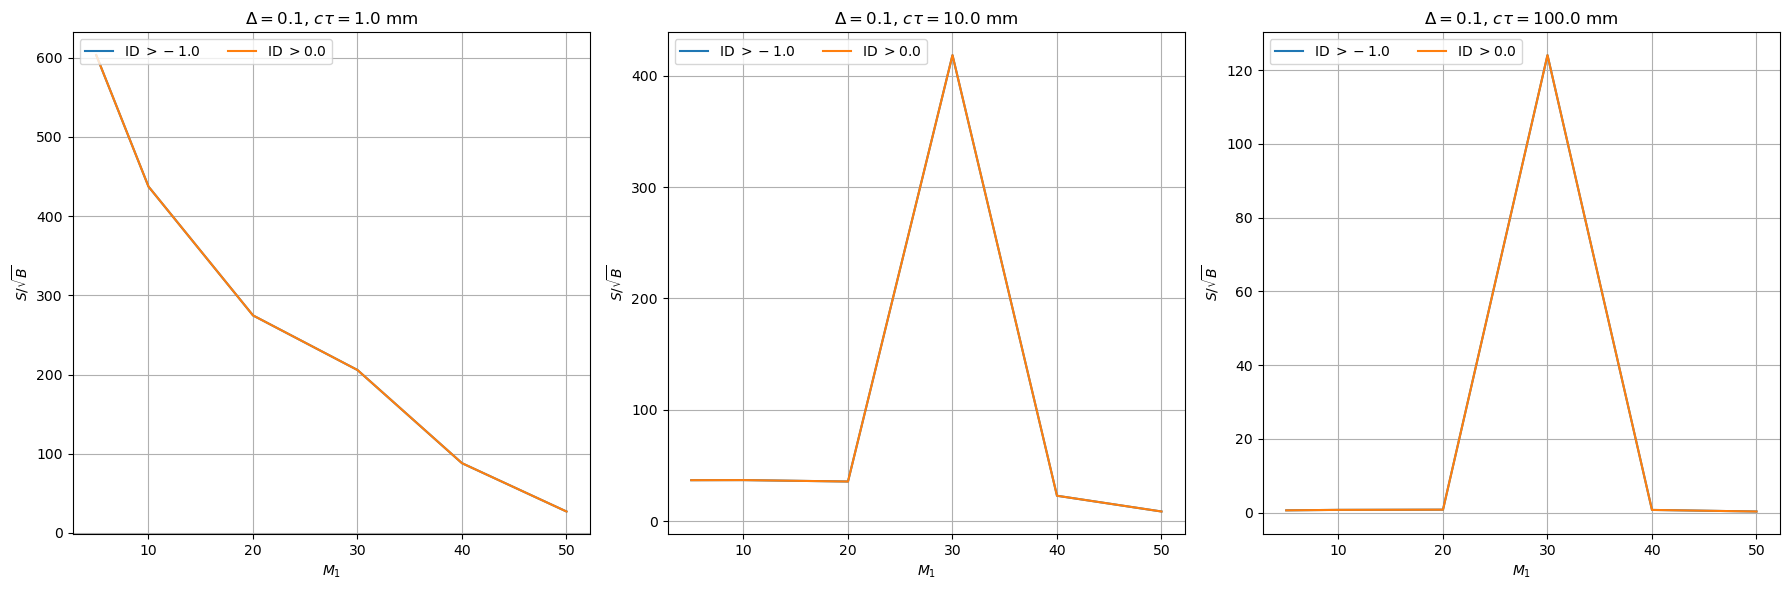

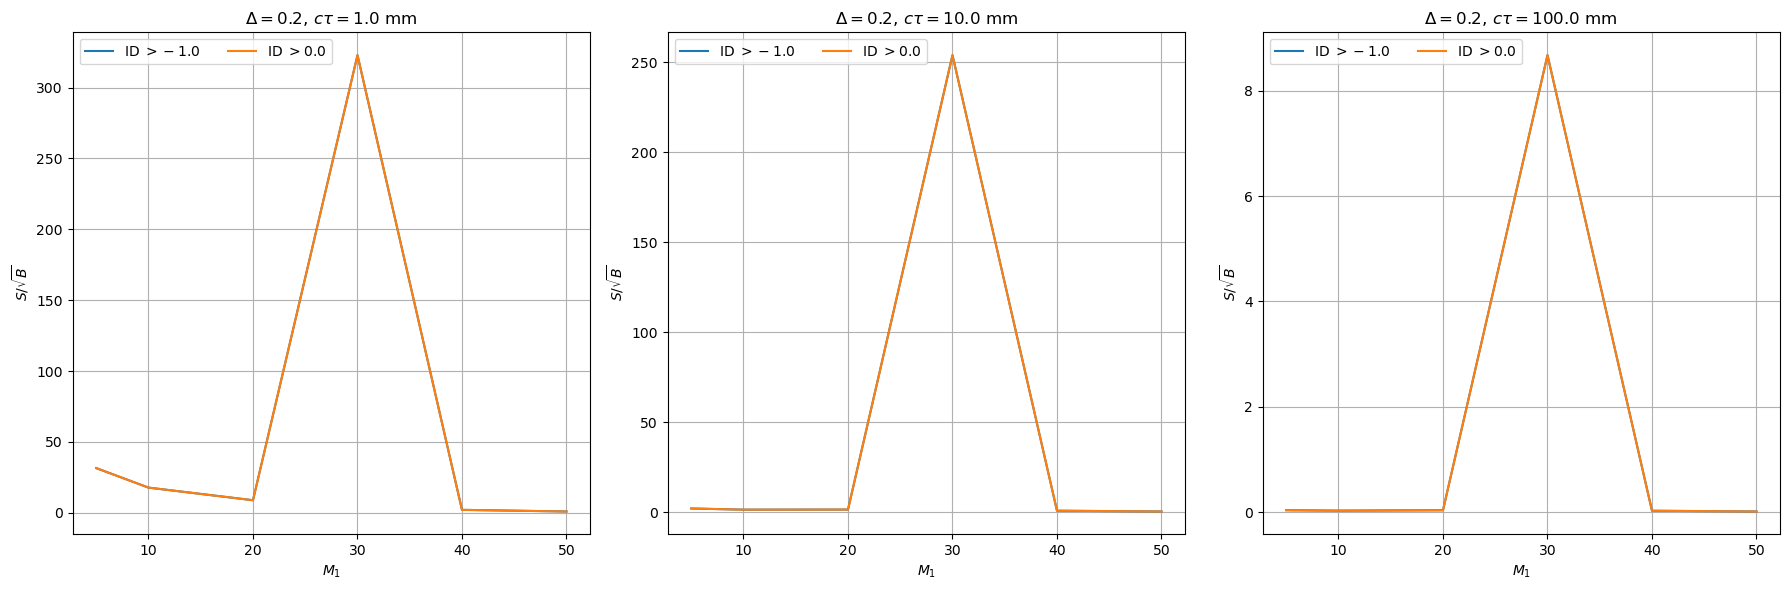

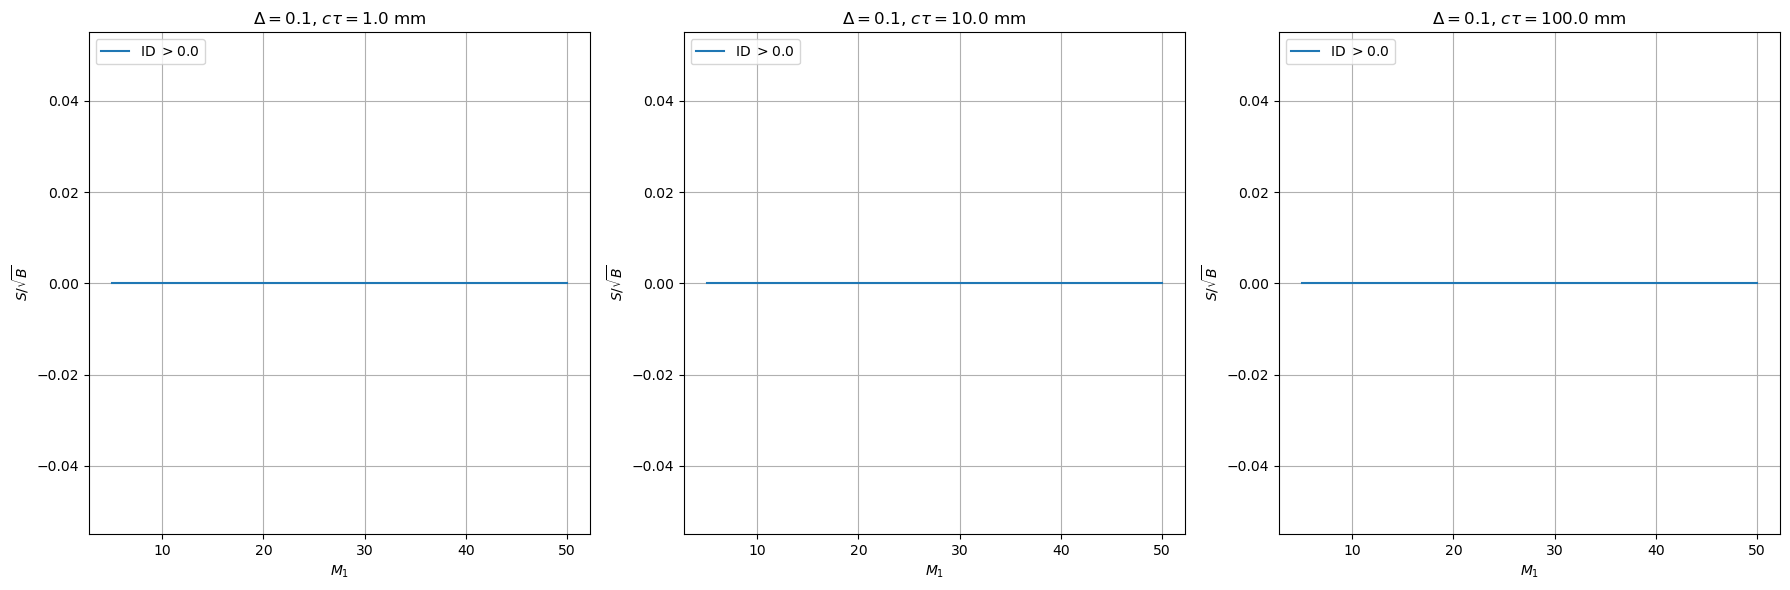

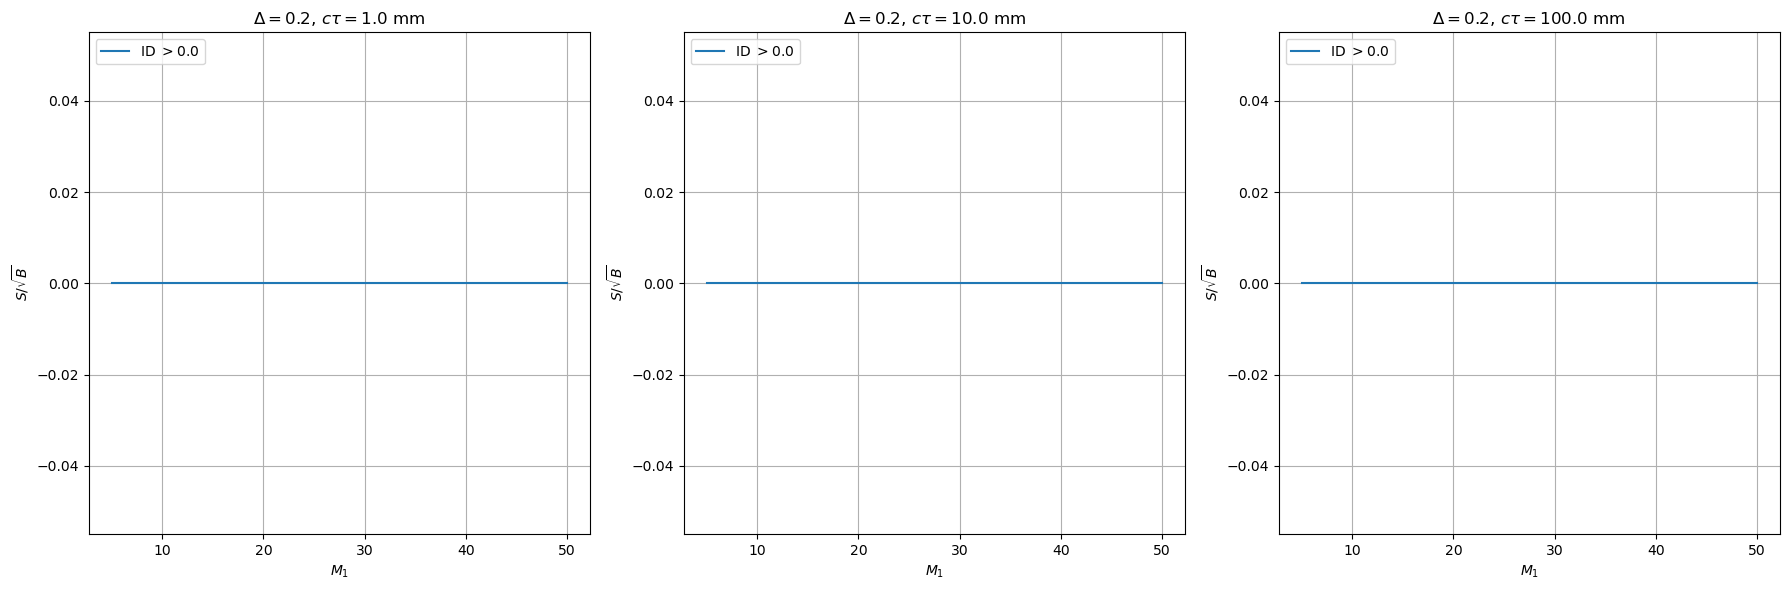

In [9]:
# S/sqrt(B) by mass - overlaid
bdt = "_LxyBDT-based_HighLxy"
#str_lt = ["./coffea/skimmed/archive/ID-all","./coffea/skimmed/archive/ID-0p0","./coffea/skimmed/archive/ID-0p5","./coffea/skimmed/archive/ID-1p0"]
str_lt = ["./coffea/skimmed/archive/ID-all","./coffea/skimmed/archive/ID-0p0"]
#lbl_lt = [-1.0,0.0,0.5,1.0]
lbl_lt = [-1.0,0.0]
y = []
deltas = []
ctaus = []
x = []

for str in str_lt:
    f_sig = str+"/signal"+bdt+".coffea"
    sig = util.load(f_sig)[0]
    
    bkg_files = {
        "QCD":str+"/bkg_2018_QCD_TuneCP5_PSWeights"+bdt+".coffea",
        "Top":str+"/bkg_2018_Top"+bdt+".coffea",
        "DY":str+"/bkg_2018_DY"+bdt+".coffea",
        "Diboson":str+"/bkg_2018_Diboson"+bdt+".coffea",
        "Triboson":str+"/bkg_2018_Triboson"+bdt+".coffea",
        "W+jets":str+"/bkg_2018_WJets"+bdt+".coffea",
        "Z+jets":str+"/bkg_2018_ZJets"+bdt+".coffea"
    }
    bkg_histos = {}
    histograms = []
    for b in bkg_files.keys():
        bkg_histos[b] = util.load(bkg_files[b])[0]
        histograms = list(bkg_histos[b].keys())
    bkg = {}
    for h in histograms:
        if type(bkg_histos['QCD'][h]) != hist.Hist:
            bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

    cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
    histos = [k for k in sig.keys() if k not in cutflows]
    sig_samples = list(sig['cutflow'].keys())
    si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
    cuts = list(sig['cutflow'][sig_samples[0]].keys())
    cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
    deltas = sorted(list(set(si.delta)))
    ctaus = sorted(list(set(si.ctau)))

    tot_bkg_cts = {}
    tot_bkg_effs = {}
    total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
    for b in bkg['cutflow_cts'].keys():
        cfd = bkg['cutflow_cts'][b]
        effd = bkg['cutflow'][b]
        cts_dict = {k:0 for k in cuts}
        for k in cfd.keys():
            for c in cuts:
                cts_dict[c] += cfd[k][c]
        tot_bkg_cts[b] = cts_dict
        tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
    bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

    m1s_lt = []
    effs_lt = []
    ct_s = sig['cutflow_cts']
    for delta in deltas:
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(ct_s[pt][cuts[-1]]/np.sqrt(bkg_summed_cts[cuts[-1]]))
            m1s_lt.append(m1s)
            effs_lt.append(effs)
    x.append(m1s_lt)
    y.append(effs_lt)

print(y)

for i,delta in enumerate(deltas):
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for j,ct in enumerate(ctaus):
        plt.sca(axes[j])
        #plt.sca(axes)
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for k in range(len(str_lt)):
            plt.plot(x[k][i*len(ctaus)+j],y[k][i*len(ctaus)+j],label=r"ID $> {:.1f}$".format(lbl_lt[k]))
        #plt.yscale('log')
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()

## difference
for i,delta in enumerate(deltas):
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for j,ct in enumerate(ctaus):
        plt.sca(axes[j])
        #plt.sca(axes)
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        print(np.around(np.array(y[0][i*len(ctaus)+j])-np.array(y[1][i*len(ctaus)+j]),decimals=5))
        plt.plot(x[0][i*len(ctaus)+j],np.array(y[0][i*len(ctaus)+j])-np.array(y[1][i*len(ctaus)+j]),label=r"ID $> {:.1f}$".format(lbl_lt[k]))
        #plt.yscale('log')
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()

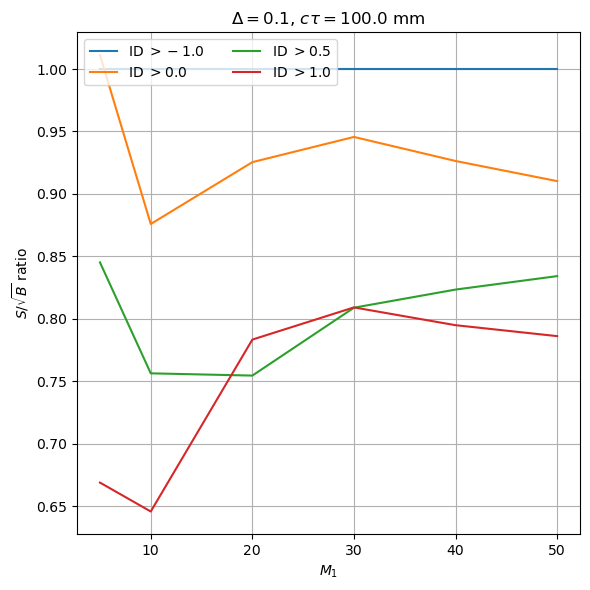

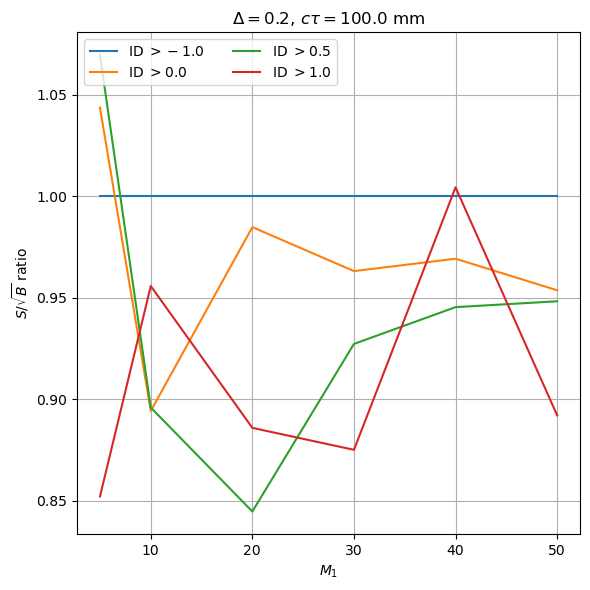

In [37]:
# ratios of S/sqrt(B) plots - overlaid
import copy

bdtct = "_SR_BDTv2_ctau-100"
str_lt = ["./coffea/skimmed/ID-all","./coffea/skimmed/ID-0p0","./coffea/skimmed/ID-0p5","./coffea/skimmed/ID-1p0"]
lbl_lt = [-1.0,0.0,0.5,1.0]
y = []
deltas = []
ctaus = []
x = []

for str in str_lt:
    f_sig = str+"/signal"+bdtct+"_5to50_skimmed.coffea"
    sig = util.load(f_sig)[0]
    
    bkg_files = {
        "QCD":str+"/bkg_2018_QCD_TuneCP5_PSWeights"+bdtct+"_5to50_skimmed.coffea",
        "Top":str+"/bkg_2018_Top"+bdtct+"_5to50_skimmed.coffea",
        "DY":str+"/bkg_2018_DY"+bdtct+"_5to50_skimmed.coffea",
        "Diboson":str+"/bkg_2018_Diboson"+bdtct+"_5to50_skimmed.coffea",
        "Triboson":str+"/bkg_2018_Triboson"+bdtct+"_5to50_skimmed.coffea",
        "W+jets":str+"/bkg_2018_WJets"+bdtct+"_5to50_skimmed.coffea",
        "Z+jets":str+"/bkg_2018_ZJets"+bdtct+"_5to50_skimmed.coffea"
    }
    bkg_histos = {}
    histograms = []
    for b in bkg_files.keys():
        bkg_histos[b] = util.load(bkg_files[b])[0]
        histograms = list(bkg_histos[b].keys())
    bkg = {}
    for h in histograms:
        if type(bkg_histos['QCD'][h]) != hist.Hist:
            bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

    cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
    histos = [k for k in sig.keys() if k not in cutflows]
    sig_samples = list(sig['cutflow'].keys())
    si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
    cuts = list(sig['cutflow'][sig_samples[0]].keys())
    cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
    deltas = sorted(list(set(si.delta)))
    ctaus = sorted(list(set(si.ctau)))

    tot_bkg_cts = {}
    tot_bkg_effs = {}
    total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
    for b in bkg['cutflow_cts'].keys():
        cfd = bkg['cutflow_cts'][b]
        effd = bkg['cutflow'][b]
        cts_dict = {k:0 for k in cuts}
        for k in cfd.keys():
            for c in cuts:
                cts_dict[c] += cfd[k][c]
        tot_bkg_cts[b] = cts_dict
        tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
    bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

    m1s_lt = []
    effs_lt = []
    ct_s = sig['cutflow_cts']
    for delta in deltas:
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(ct_s[pt][cuts[-1]]/np.sqrt(bkg_summed_cts[cuts[-1]]))
            m1s_lt.append(m1s)
            effs_lt.append(effs)
    x.append(m1s_lt)
    y.append(effs_lt)

nocuts_lt = copy.deepcopy(y[0])
# calculate ratios
for i in range(len(lbl_lt)):
    for j in range(len(deltas)):
        for k,eff in enumerate(y[i][j]):
            y[i][j][k] = eff/nocuts_lt[j][k]

for i,delta in enumerate(deltas):
    fig,axes = plt.subplots(len(ctaus),figsize=(6*len(ctaus),6))
    for j,ct in enumerate(ctaus):
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for k in range(len(str_lt)):
            plt.plot(x[k][i*len(ctaus)+j],y[k][i*len(ctaus)+j],label=r"ID $> {:.1f}$".format(lbl_lt[k]))
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$ ratio")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()

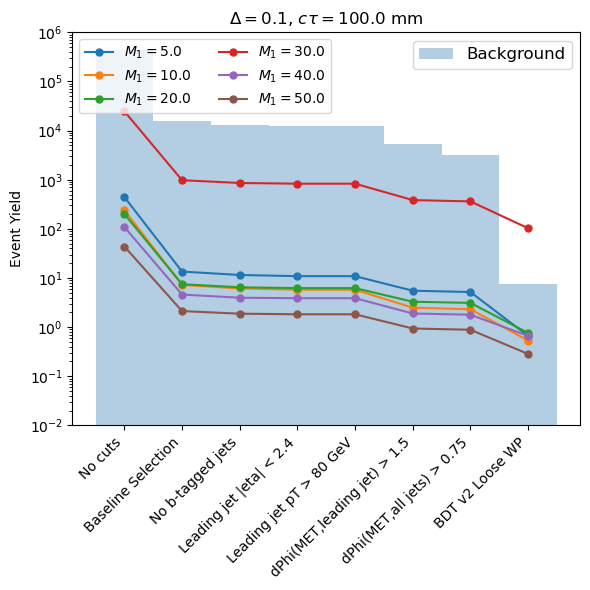

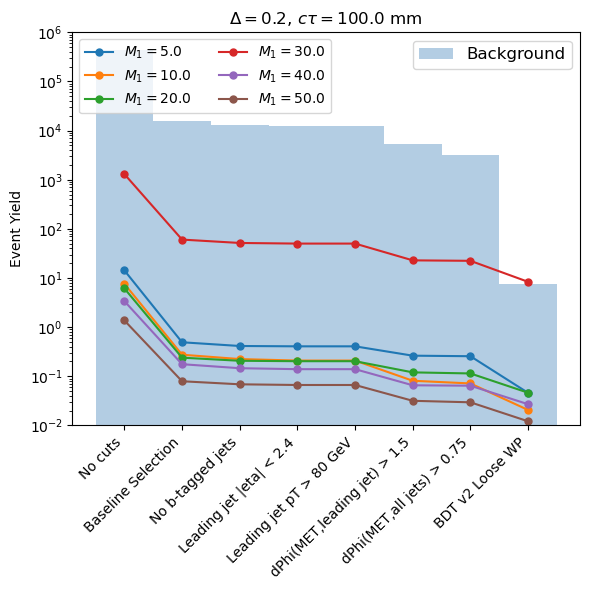

In [31]:
# event yields
backgrounds = list(tot_bkg_cts.keys())

for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        #plt.sca(axes[i])
        bkg_labels = []
        bkg_heights = []
        bottoms = np.array([0.0 for c in cuts])
        cmap = plt.get_cmap('Pastel1')
        bars = []
        for b in backgrounds:
            heights = [tot_bkg_cts[b][c] for c in cuts]
            x = np.arange(len(cuts))
            bars.append(plt.bar(x,heights,width=1,align='center',bottom=bottoms,color=cmap(1)))
            bottoms += np.array(heights)
        leg1 = plt.legend(bars,["Background"],loc='upper right',fontsize=12,ncol=2)
        ax = plt.gca().add_artist(leg1)
        
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        lines = []
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [sig['cutflow_cts'][pt][cut] for cut in cuts]
            l, = plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),marker='.',markersize=10)
            lines.append(l)
        plt.legend(handles=lines,loc='upper left',ncol=2)
        plt.ylim([1e-2,1e6])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel("Event Yield")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        #plt.grid()
    plt.tight_layout()
    #plt.close()

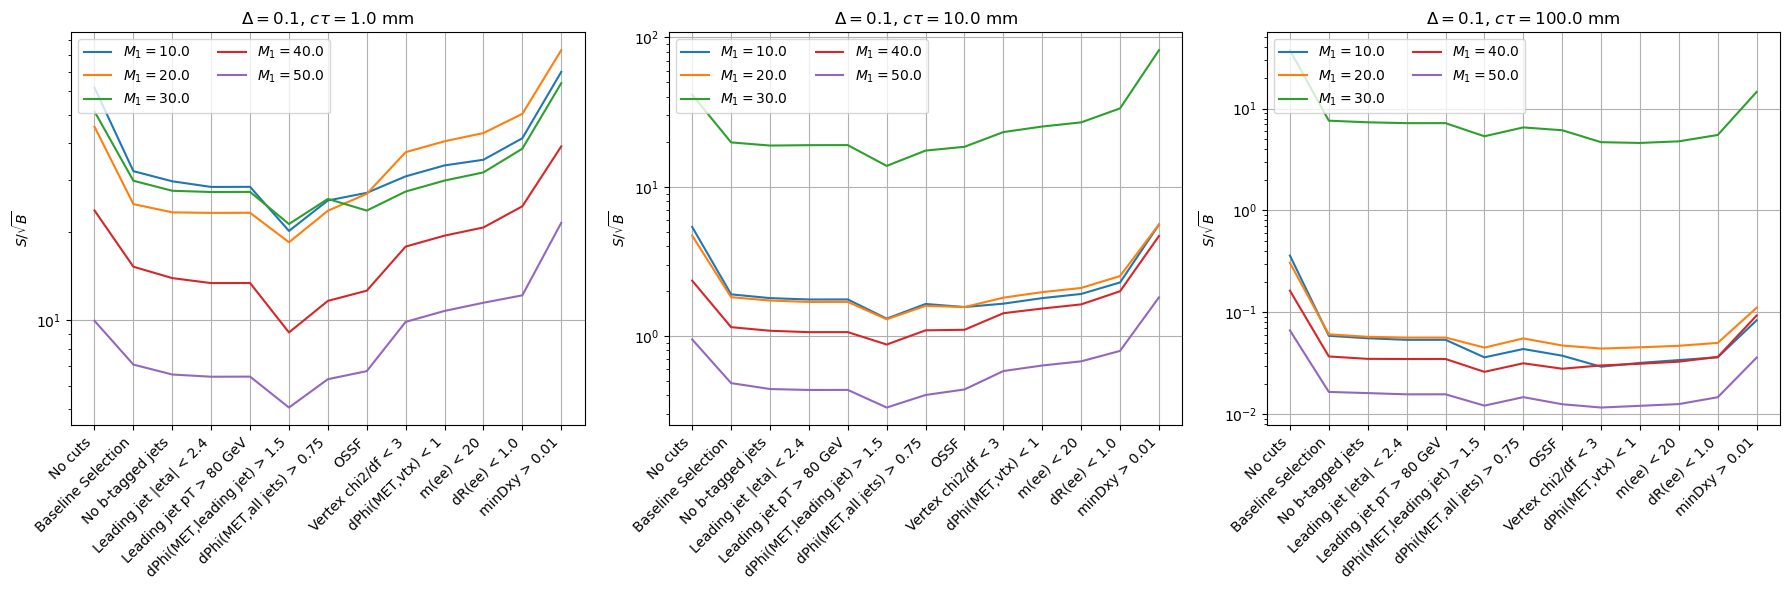

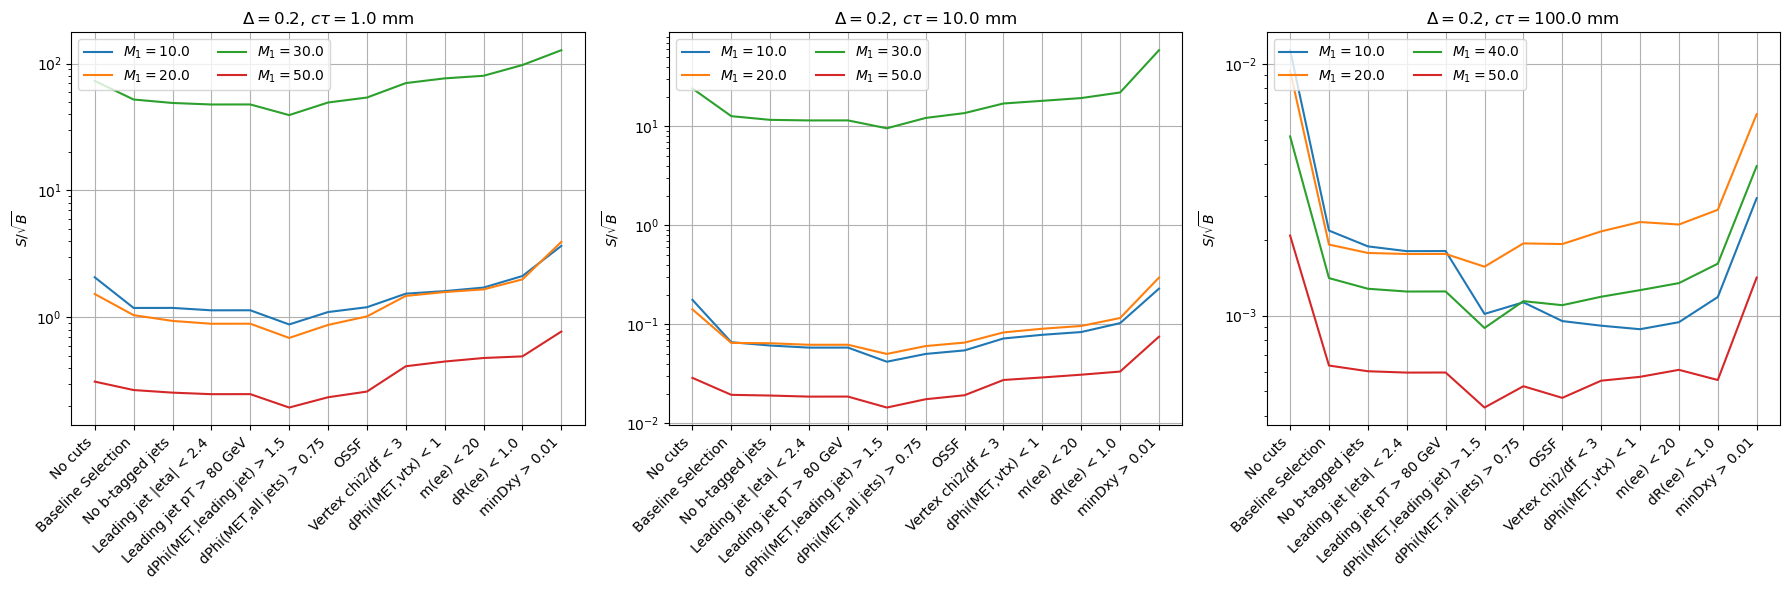

In [22]:
# S/sqrt(B)
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [ct_s[pt][cut]/np.sqrt(bkg_summed_cts[cut]) for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1))
        plt.legend(loc='upper left',ncol=2)
        #plt.ylim([1e-5,1e2])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel(r"$S/\sqrt{B}$")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_signif_delta{delta:.1f}.pdf")
    #plt.close()

[[[0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0]]]
[[[1753.2410800771258, 1072.26222171099, 854.4073325322653, 960.9995233726482, 499.574488537935, 214.11927694499366], [62.60812182740625, 42.24514830716804, 37.158979390648284, 2143.166005160525, 9.722081376882924]], [[1700.6321508433778, 1018.9445783463949, 829.7718346346675, 934.1449487242354, 490.00369250415633, 212.05463315941643], [58.73142290672973, 41.817276138397325, 36.31856384112607, 2113.671189739373, 9.722081376882924]], [[1507.824384933013, 917.6434023904608, 766.1553059792524, 877.0795597378398, 454.37861647096315, 197.04407663682363], [54.2134419409788, 39.47007044391771, 34.07575557841231, 1959.1046580521433, 9.722081376882924]], [[1385.086612919838, 821.5940897096632, 702.6744723835496, 793.0664534659479, 413.30218749238315, 181.53385954425784], [48.40503854334641, 34.77918001578106, 31.411295454056216, 1

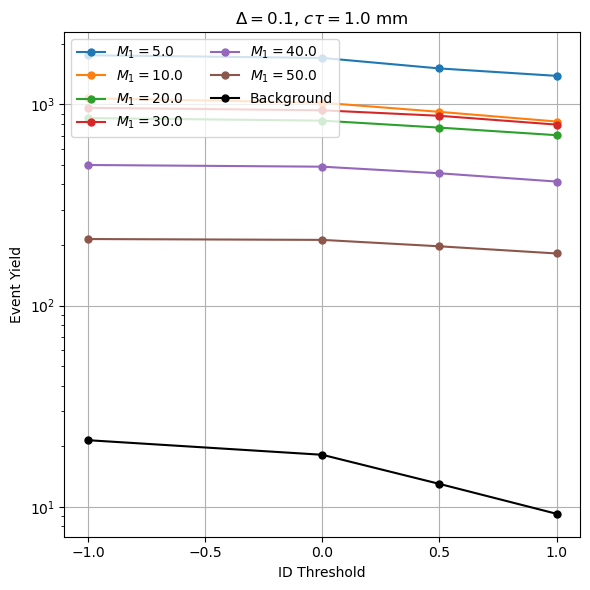

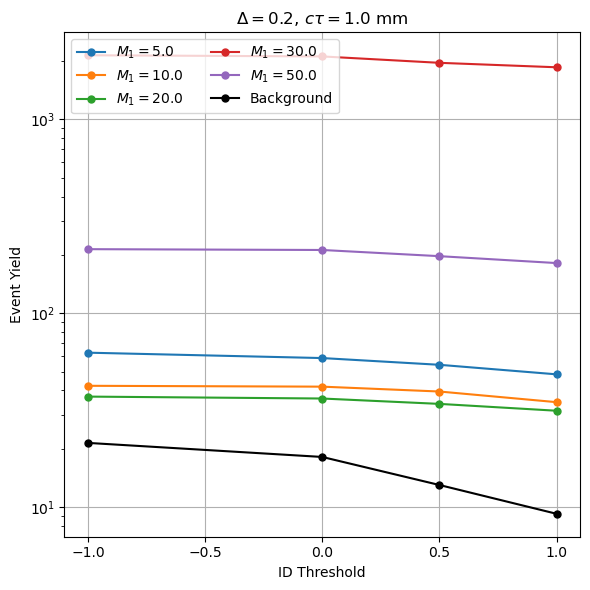

In [43]:
# Event Yields - M1 + bkg overlay
import copy

bdt = "_SR_BDTv2_ctau-1"
str_lt = ["./coffea/skimmed/ID-all","./coffea/skimmed/ID-0p0","./coffea/skimmed/ID-0p5","./coffea/skimmed/ID-1p0"]
x = [-1.0,0.0,0.5,1.0]
y_by_id = []
y = []
y_bkg = []
deltas = []
ctaus = []
lbl_lt = [] # m1s

for str in str_lt:
    f_sig = str+"/signal"+bdt+".coffea"
    sig = util.load(f_sig)[0]
    
    bkg_files = {
        "QCD":str+"/bkg_2018_QCD_TuneCP5_PSWeights"+bdt+".coffea",
        "Top":str+"/bkg_2018_Top"+bdt+".coffea",
        "DY":str+"/bkg_2018_DY"+bdt+".coffea",
        "Diboson":str+"/bkg_2018_Diboson"+bdt+".coffea",
        "Triboson":str+"/bkg_2018_Triboson"+bdt+".coffea",
        "W+jets":str+"/bkg_2018_WJets"+bdt+".coffea",
        "Z+jets":str+"/bkg_2018_ZJets"+bdt+".coffea"
    }
    bkg_histos = {}
    histograms = []
    for b in bkg_files.keys():
        bkg_histos[b] = util.load(bkg_files[b])[0]
        histograms = list(bkg_histos[b].keys())
    bkg = {}
    for h in histograms:
        if type(bkg_histos['QCD'][h]) != hist.Hist:
            bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

    cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
    histos = [k for k in sig.keys() if k not in cutflows]
    sig_samples = list(sig['cutflow'].keys())
    si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
    cuts = list(sig['cutflow'][sig_samples[0]].keys())
    cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
    deltas = sorted(list(set(si.delta)))
    ctaus = sorted(list(set(si.ctau)))

    tot_bkg_cts = {}
    tot_bkg_effs = {}
    total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
    for b in bkg['cutflow_cts'].keys():
        cfd = bkg['cutflow_cts'][b]
        effd = bkg['cutflow'][b]
        cts_dict = {k:0 for k in cuts}
        for k in cfd.keys():
            for c in cuts:
                cts_dict[c] += cfd[k][c]
        tot_bkg_cts[b] = cts_dict
        tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
    bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}
    y_bkg.append(bkg_summed_cts[cuts[-1]])
    
    m1s_lt = []
    sig_cts_lt = []
    
    ct_s = sig['cutflow_cts']
    for delta in deltas:
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            sig_cts = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                sig_cts.append(ct_s[pt][cuts[-1]])
            m1s_lt.append(m1s)
            sig_cts_lt.append(sig_cts)
    lbl_lt.append(m1s_lt)
    y_by_id.append(sig_cts_lt)

#rearrange elements of y to plot by m1
y = []
sublist = []
rowlist = []
for row in y_by_id: #id
    sublist.append(0)
for col in y_by_id[0]: #delta and ctau coord
    rowlist.append(copy.deepcopy(sublist))
for elem in y_by_id[0][0]:
    y.append(copy.deepcopy(rowlist))

if bdtct == "_SR_BDTv2_ctau-1":
    y[4].pop(1)

print(y)
print(y_by_id)

for i in range(len(y)):
    for j in range(len(y[i])):
        for k in range(len(y[i][j])):
            if j == 1 and i > 4 and bdtct == "_SR_BDTv2_ctau-1":
                print(i,j,k)
                y[i][j][k] = y_by_id[k][j][i-1]
            else:
                y[i][j][k] = y_by_id[k][j][i]

print(y)

for i,delta in enumerate(deltas):
    fig,axes = plt.subplots(len(ctaus),figsize=(6*len(ctaus),6))
    print("delta = ",delta)
    for j,ct in enumerate(ctaus):
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for k in range(len(lbl_lt[0][0])):
            if bdtct == "_SR_BDTv2_ctau-1" and i == 1 and k == 4:
                continue
            elif bdtct == "_SR_BDTv2_ctau-1" and i == 1 and k > 4:
                plt.plot(x,y[k][i-1],label=r"$M_1 = {:.1f}$".format(lbl_lt[0][0][k]),marker='.',markersize=10)
                print(y[k][i-1])
            else:
                plt.plot(x,y[k][i],label=r"$M_1 = {:.1f}$".format(lbl_lt[0][0][k]),marker='.',markersize=10)
                print(y[k][i])
        plt.plot(x,y_bkg,label="Background",color="black",marker='.',markersize=10)
        print(y_bkg)
        plt.xticks(np.arange(min(x), max(x)+0.5, 0.5))
        plt.yscale('log')
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"Event Yield")
        plt.xlabel(r"ID Threshold")
        plt.grid()
    plt.tight_layout()